In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg, fftpack as fp, interpolate as ip
import csv
from pathlib import Path

In [2]:
FIGS_DIR = Path("plots")
FIGS_DIR.mkdir(exist_ok=True)

FILES_DIR = Path("files")
FILES_DIR.mkdir(exist_ok=True)

# Data records

In this notebook we analize data taken with an oscilloscope and data taken with the spectrum analizer in APC.

We use the board number 3 containing the v4.5 ASIC and the CMB board for comparison.

We took three sets of data:

1. Boards using the laboratory power supply
2. Boards using the laboratory power supply with the output filtered (custom-made filter at APC)
3. Boards using battery as power supply 

## Noise plots 

One important characteristic of the AwaXe devices is the noise behavior. In this section is presented the DAC noise measurements. The goal of this measurements is to find the values of the intrinsic output current noise source $i_n$ for the DACs (DAC TES and DAC SQUID).

The frequency range of interest is from 0.1\,Hz to 1000\,Hz. This range of frequencies is divided into three regions, the ultra-low frequency (ULF) region from 0.1\,Hz to 10\,Hz, one low-frequency (LF) region from 1\,Hz to 100\,Hz and a high-frequency (HF) region from 10\,Hz up to 1000\,Hz. This allows to have an overlap within the range of 10 to 100\,Hz to verify the homogeneity of the measurement. 

The experimental setup for the measurement of the noise characteristics of both devices was the same. A Keysight E3649A power supply was used to bias the boards (differential voltage $V_{cc}$ and $V_{ee}$). The output data was amplified by a Stanford Research SR650 low-noise amplifier, and for visualization and record, an Agilent 89410A  Vector Signal Analyzer was used. 

In order to understand how to analyze the data from the noise measurements, the noise path is presented in \figurename~\ref{fig:LNA_noise} for the LNA and \figurename~\ref{fig:DAC_noise} for the DAC.

\begin{figure}[H]  \centering
    \begin{circuitikz}
		%Circuit
		\draw (0,0) -- (-3,2) -- (-3,-2) (-1.75,0) node {ASIC LNA};
            \draw (0,0) -- (-3,-2);
            \draw (-1.5,1) to [R = $50\,\Omega$] (1.5, 1);
            \draw (-1.5,-1) to [R = $50\,\Omega$] (1.5, -1);
            \draw (1.5,1) to [R = $100\,\Omega$] (1.5,-1);
            \draw (1.5,1) -- (3,1);
            \draw (1.5,-1) -- (3,-1);
            \draw (6,0) -- (3,2) -- (3,-2) (4.25,0) node {SR560};
            \draw (6,0) -- (3,-2);
            \draw (6,0) -- (6.5,0) (7.5,0) node {$n_{oLNA}$};
            \draw (7.5,-2.5) node {meas. LNA noise};
            \draw (-7,1) node [ground](GND){} to [R = $50\,\Omega$] (-4,1) -- (-3,1);
            \draw (-7,-1) node [ground](GND){} to [R = $50\,\Omega$] (-4,-1) -- (-3,-1);
            \draw(-4,1) to [nV, l=$e_n$] (-4,-1);
            \draw[->] (6,-2.5) -- (3,-2.5) ;
            \draw (4.5,-2.2) node {/ 1000 };
            \draw (4.5,-2.2) node {/ 1000 };
            \draw[->] (2.8,-2.5) -- (-1.5,-2.5);
            \draw (0.8,-2.2) node {$\times$ 2 };
            \draw[->] (-1.7,-2.5) -- (-3,-2.5);
            \draw (-2.4,-2.2) node {/ 160 };
            \draw (-4, -2.5) node {$\sqrt{S_V}$};
\end{circuitikz}
    \caption{Electronic schematic showing the LNA noise measurement setup.}
    \label{fig:LNA_noise}
\end{figure}



In this analysis, there are something to note: 

1. The DAC's voltage measured within 10s by the Oscilloscope with BW = 1 GHz
2. DAC voltage converted into current using the relation below:
       $$ \sqrt{S_I} = \frac{n_{out}*2}{1000*510} = \frac{n_{out \times 2}}{510000}  * 10^{12} [pA]  $$ ($10^{12}$ to convert it into $pA$)
3. Data taken by Oscilloscope in 20s. With 50k sps/s with Board 1,6 and 1k sps/s for Board 4 (forgot to change)

## Board 1 

### Board 3 

In [9]:
data3 = pd.read_csv('05112024/C1--DAC_BOARD3--00000.csv', skiprows=5, header=None) # No header

N = 50125.31328211532
50125.31328211532
500002


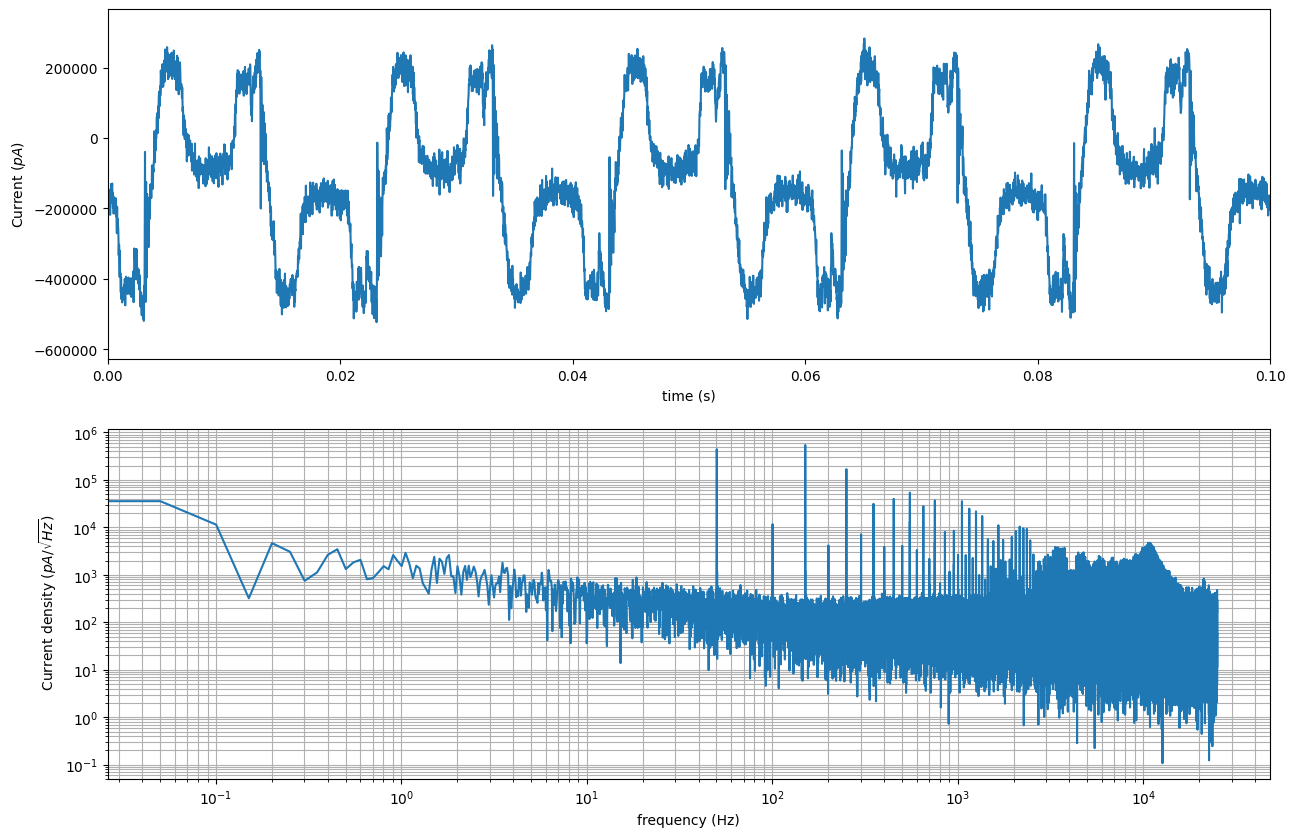

In [10]:
# FS = 1000
N =  1/(data3[0][1] - data3[0][0])
print(f'N = {N}')
fre3, val3 = compute_power_spectral_density(data3[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data3[0],data3[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre3,np.sqrt(val3), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
print(1/(data3[0][1] - data3[0][0]))
plt.grid(True, which="both")
print(np.size(fre3))

### Board 4

In [11]:
data4 = pd.read_csv('05112024/C1--DAC_BOARD4--00000.csv', skiprows=5, header=None) # No header

N = 49975.01249357768
49975.01249357768
500002


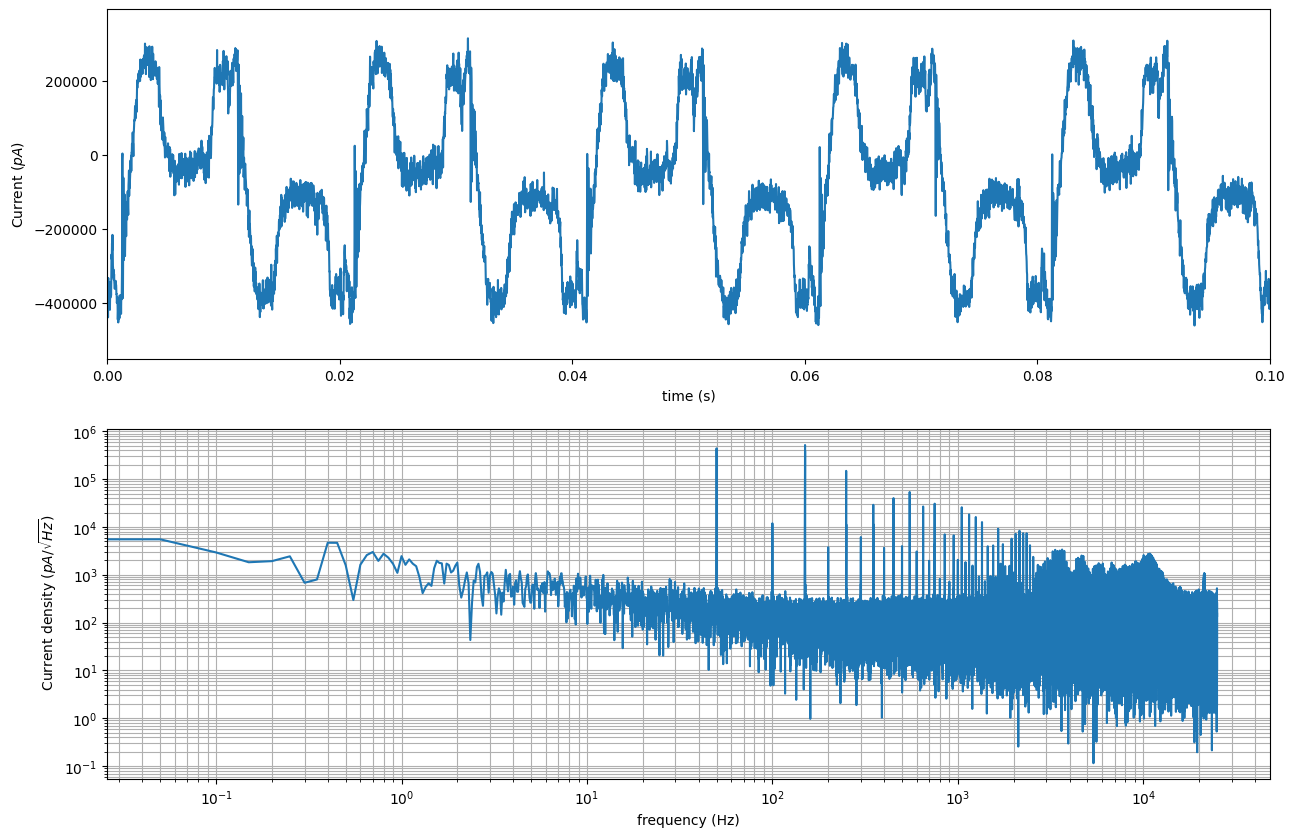

In [12]:
# FS = 1000
N =  1/(data4[0][1] - data4[0][0])
print(f'N = {N}')
fre4, val4 = compute_power_spectral_density(data4[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data4[0],data4[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre4,np.sqrt(val4), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data4[0][1] - data4[0][0]))
print(np.size(fre4))

### Board 5

In [13]:
data5 = pd.read_csv('05112024/C1--DAC_BOARD5--00000.csv', skiprows=5, header=None) # No header

N = 49975.01249357768
49975.01249357768
500002


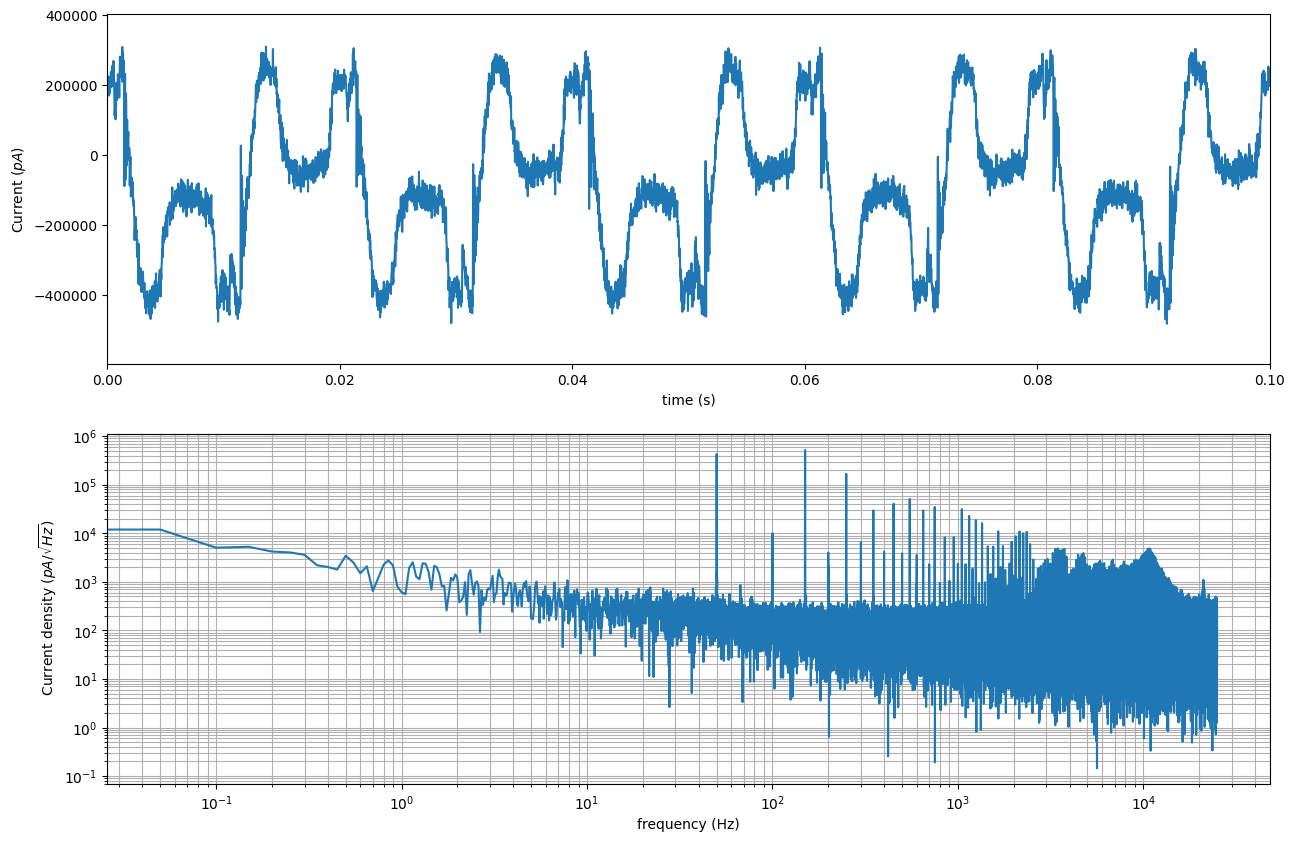

In [14]:
# FS = 1000
N =  1/(data5[0][1] - data5[0][0])
print(f'N = {N}')
fre5, val5 = compute_power_spectral_density(data5[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data5[0],data5[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre5,np.sqrt(val5), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
print(1/(data5[0][1] - data5[0][0]))
print(np.size(fre5))
plt.grid(True, which="both")

### Board 6

In [15]:
data6 = pd.read_csv('05112024/C1--DAC_BOARD6--00000.csv', skiprows=5, header=None) # No header

N = 49925.11233163061
49925.11233163061
500001


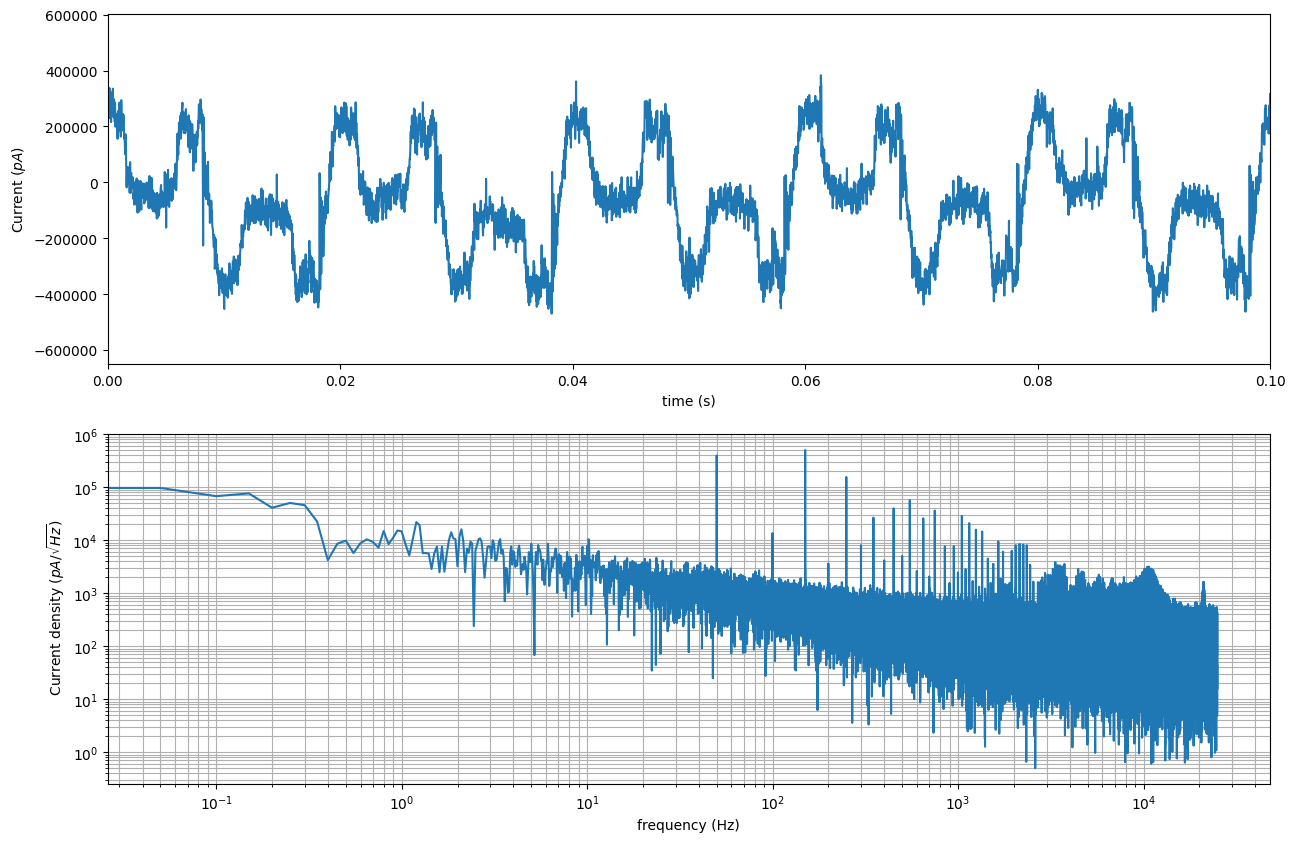

In [16]:
# FS = 1000
N =  1/(data6[0][1] - data6[0][0])
print(f'N = {N}')
fre6, val6 = compute_power_spectral_density(data6[1]*1e12*2/(510*1000), N, 1000000)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data6[0],data6[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre6,np.sqrt(val6), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data6[0][1] - data6[0][0]))
print(np.size(fre6))

## Compare the different between the PSD 

Text(0.5, 1.0, 'current noise density computed by the time domain signal of DAC')

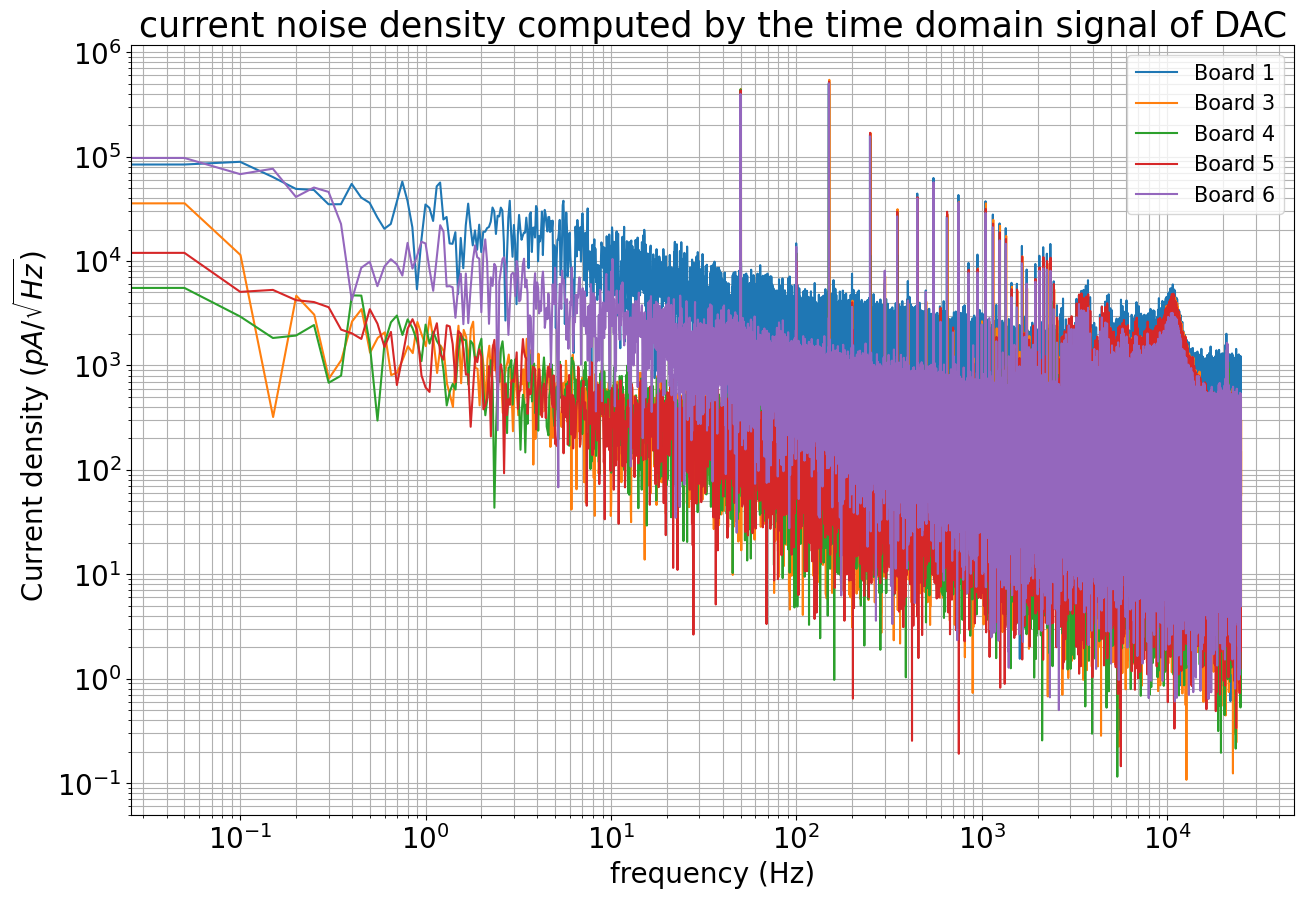

In [17]:
import matplotlib.pyplot as plt
num = [1,3,4,5,6]
fre = [fre1,fre3,fre4,fre5,fre6]
val = [val1,val3,val4,val5,val6]

plt.figure(figsize = (15,10))
for i in range(len(fre)):
    plt.loglog(fre[i], np.sqrt(val[i]), label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density computed by the time domain signal of DAC',fontsize = 25)


### Ploting data from TID test

In [18]:
TID = np.genfromtxt('PSD_TID_DAC.txt')

Text(0.5, 1.0, 'current noise density measured in TID test')

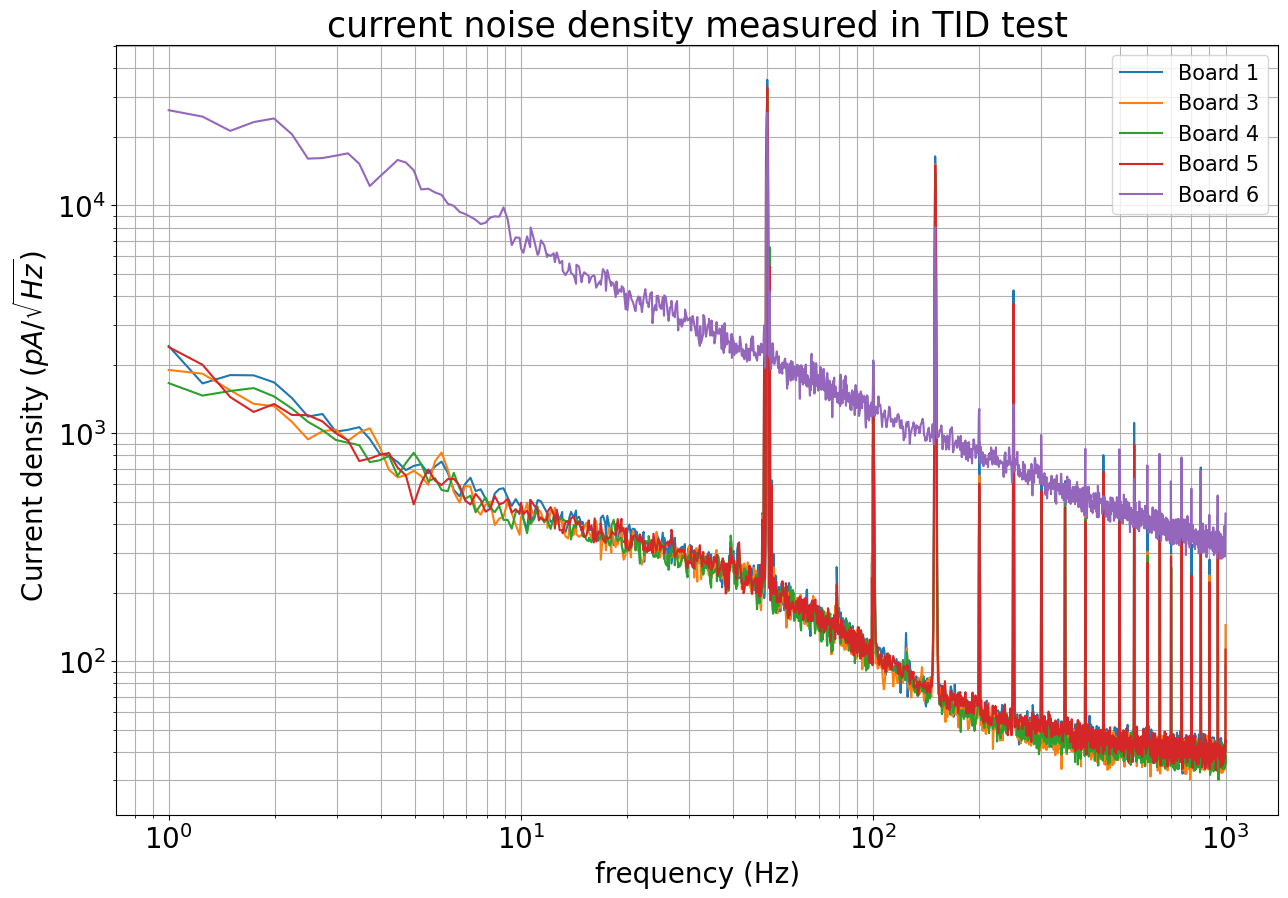

In [19]:
plt.figure(figsize = (15,10))
for i in range(len(num)):
    plt.loglog(TID[:,0], TID[:,i+1], label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density measured in TID test',fontsize = 25)


### Compare

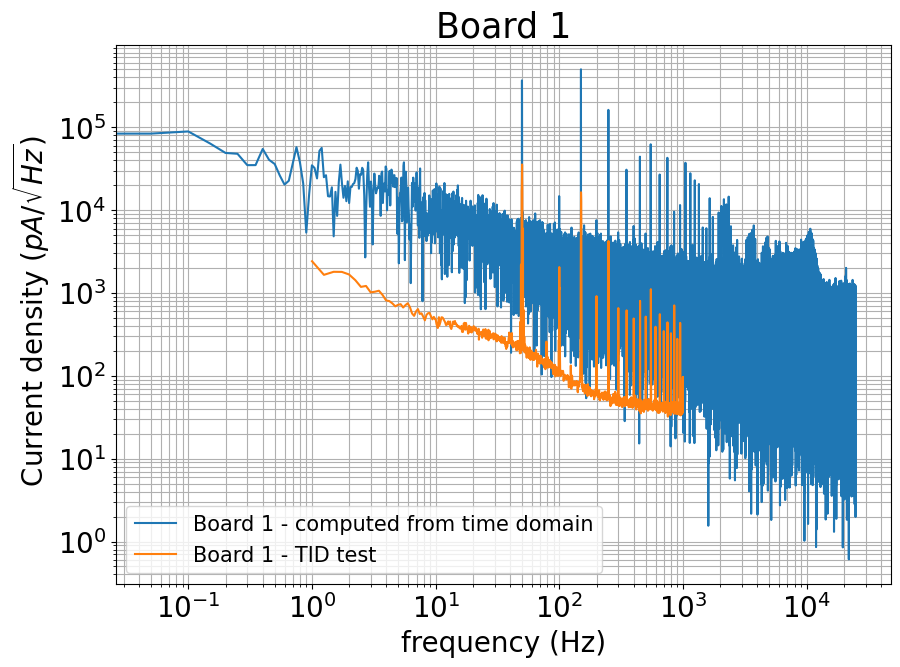

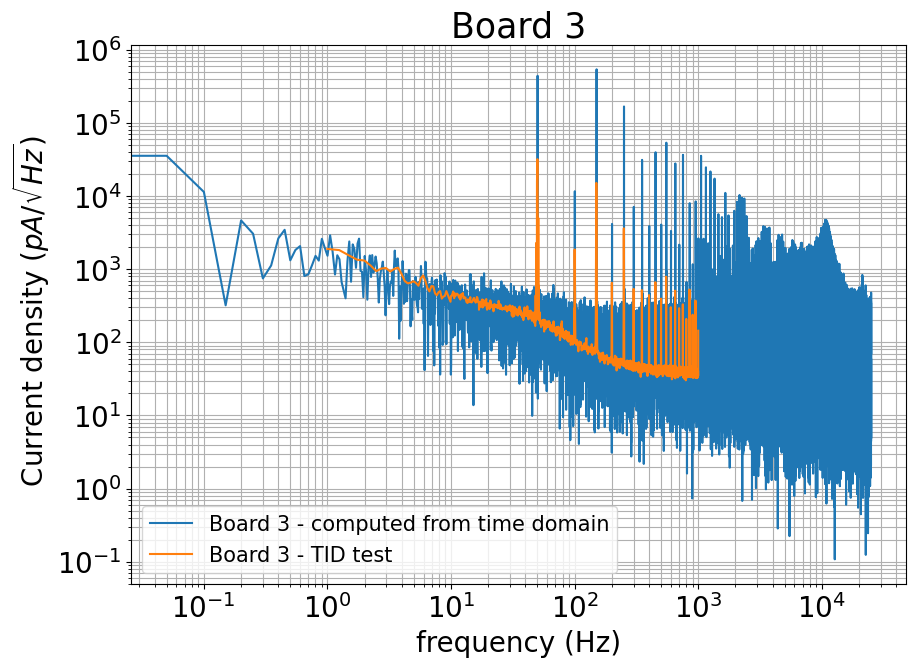

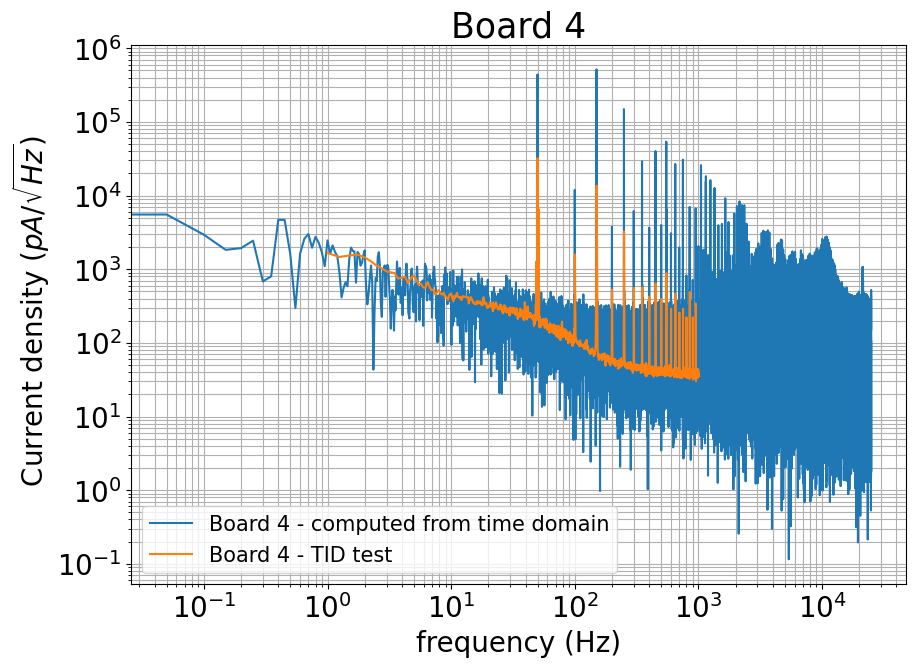

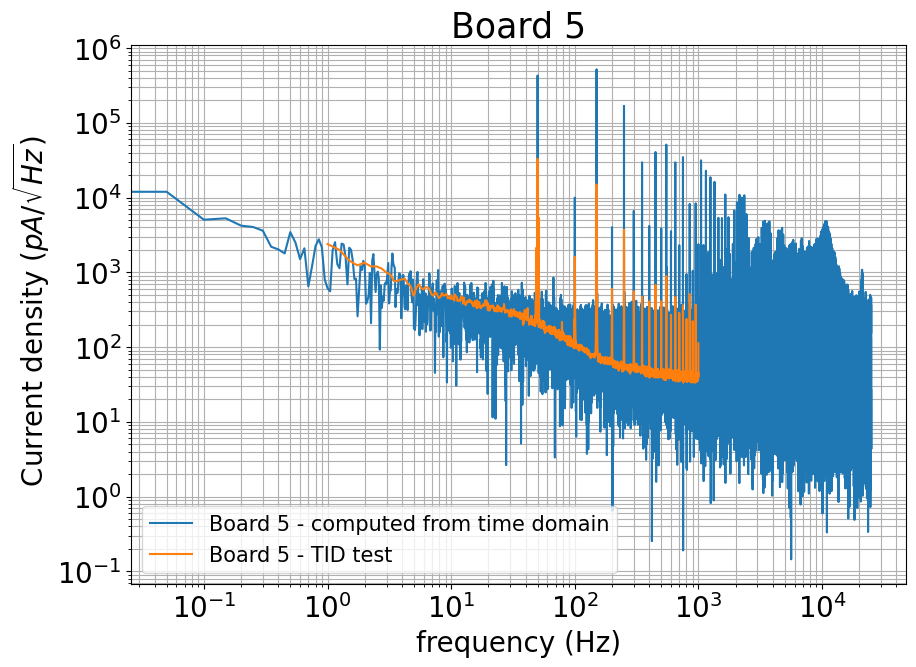

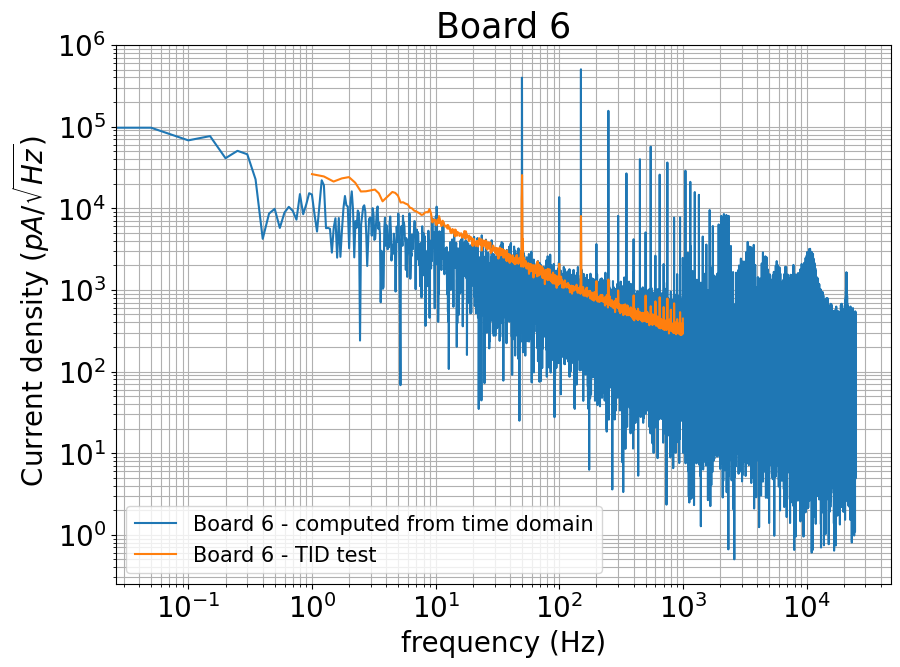

In [20]:
color = ['black', 'orange', 'green', 'red', 'brown']
num = [1,3,4,5,6]
for i in range(len(num)):
    plt.figure(figsize = (10,7))
    plt.loglog(fre[i], np.sqrt(val[i]), label = f'Board {num[i]} - computed from time domain')
    plt.loglog(TID[:,0], TID[:,i+1], label = f'Board {num[i]} - TID test')
    plt.xlabel('frequency (Hz)',fontsize = 20)
    plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 15)
    plt.grid(True, which="both")
    plt.title(f'Board {num[i]}',fontsize = 25)


### Comparing the drift

In [21]:
def data_selection(ti,te, t):
    '''
    the idea is to return the index of data lies within the range of ti and te
    '''
    in1 = np.where(t >= ti)
    in2 = np.where(t <= te)
    ind = np.intersect1d(in1,in2)
    return ind

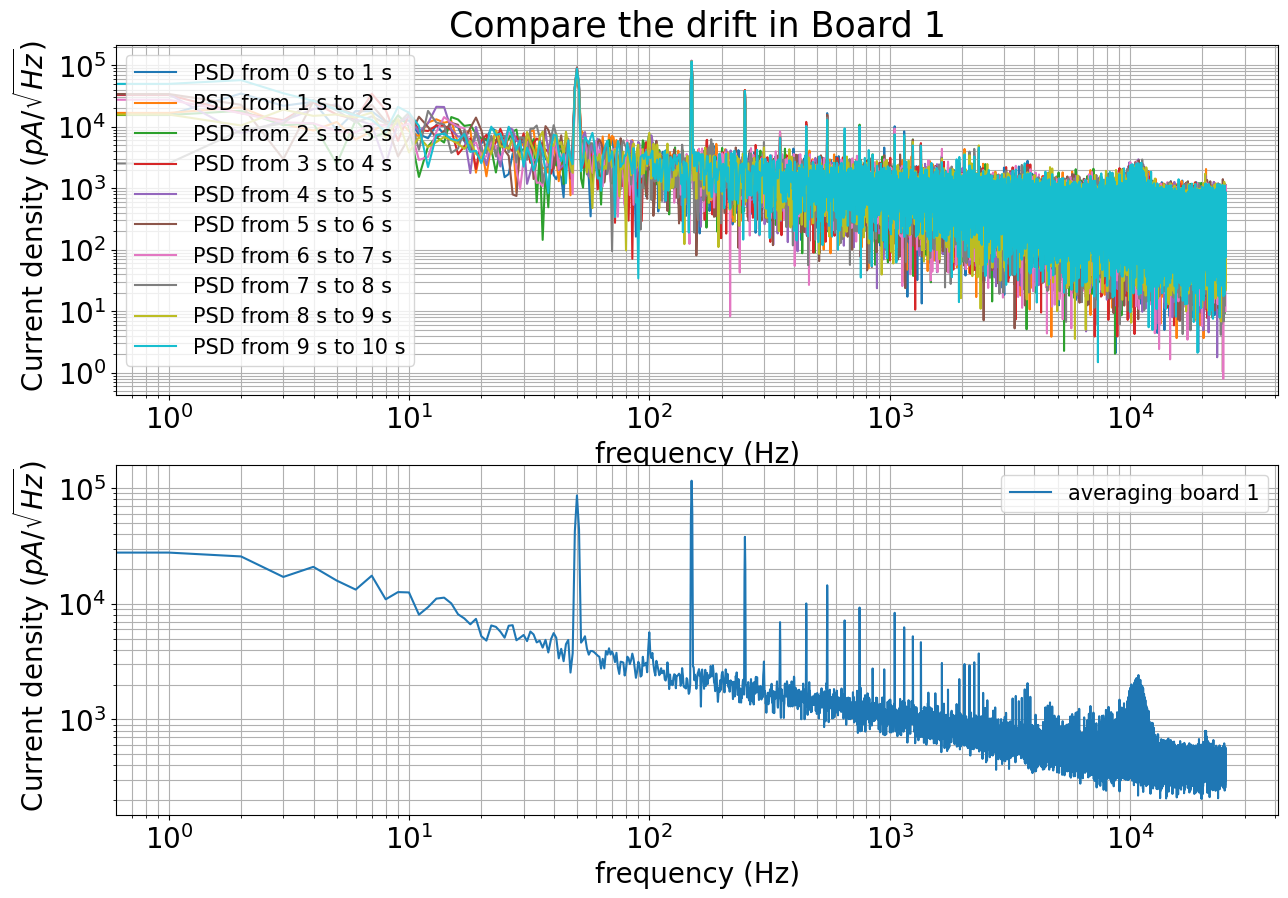

In [22]:
# test sample: data1 
factor = 1e12*2/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg1 = np.zeros(np.size(data1[0][data_selection(i,i+1, data1[0])])//2+1)

plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data1[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg1 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 1',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg1/10), label = f'averaging board 1')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

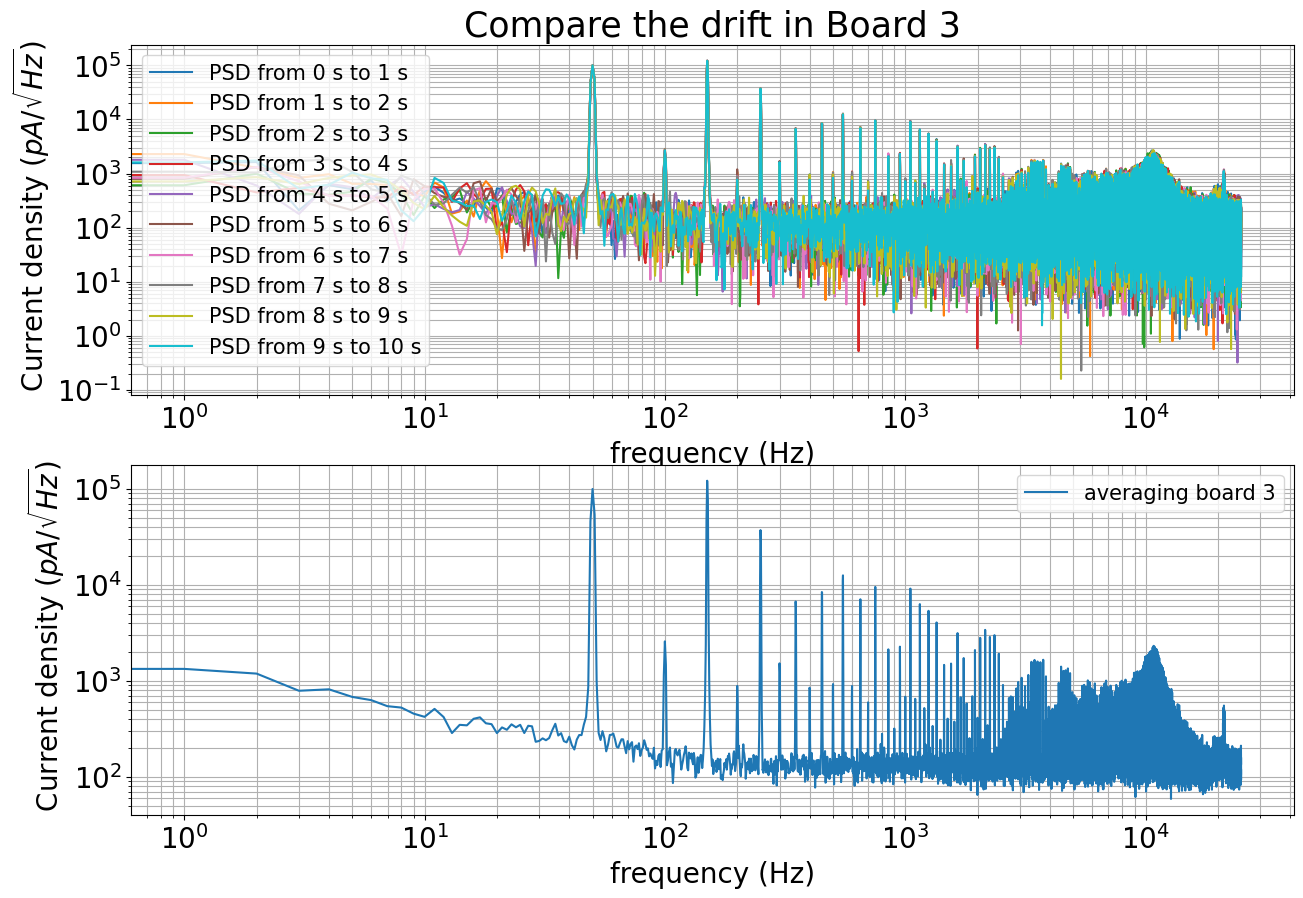

In [23]:
# test sample: data1 
factor = 1e12*2/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg3 = np.zeros(np.size(data3[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data3[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg3 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 3',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg3/10), label = f'averaging board 3')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

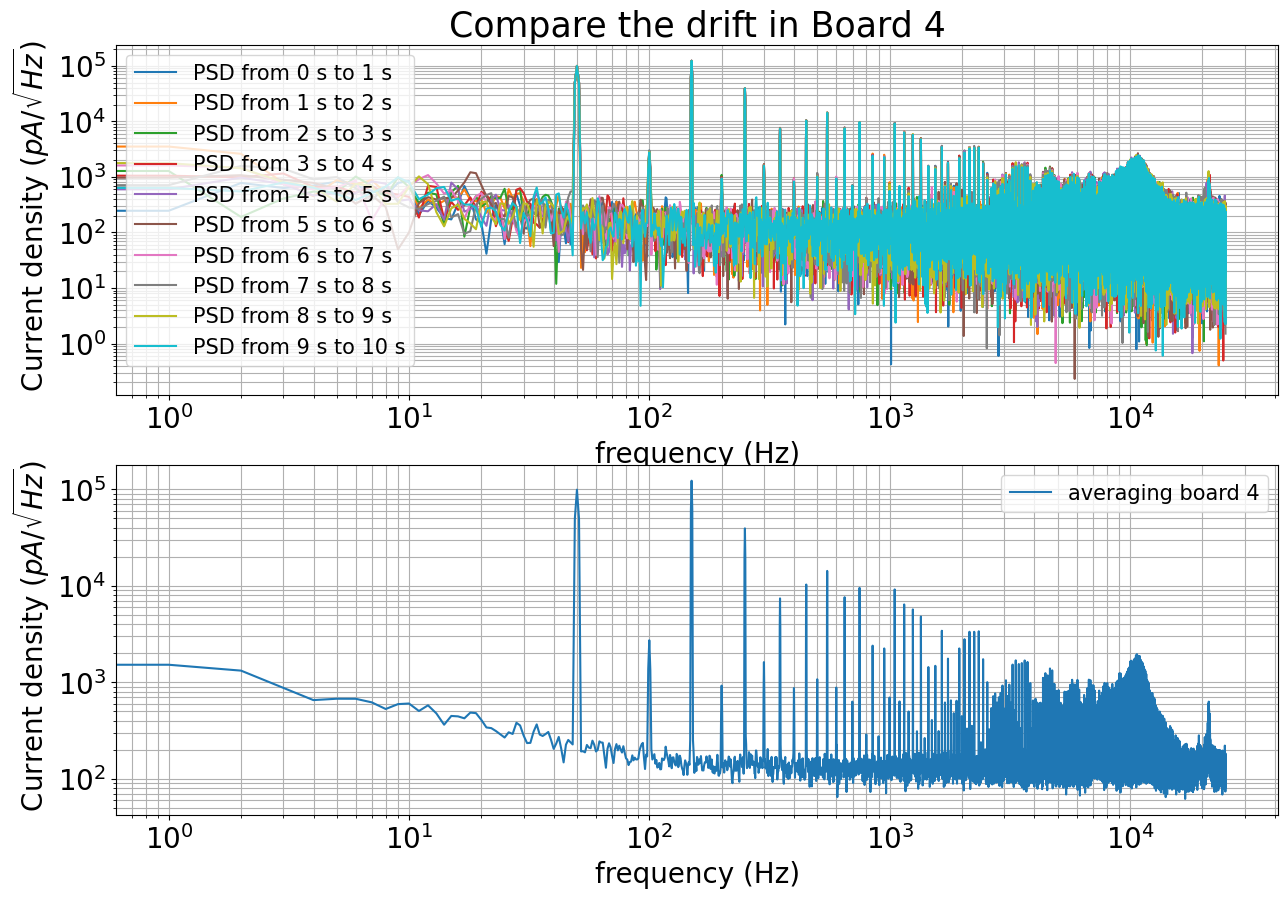

In [24]:
# test sample: data1 
factor = 1e12*2/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg4 = np.zeros(np.size(data4[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data4[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg4 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 4',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg4/10), label = f'averaging board 4')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

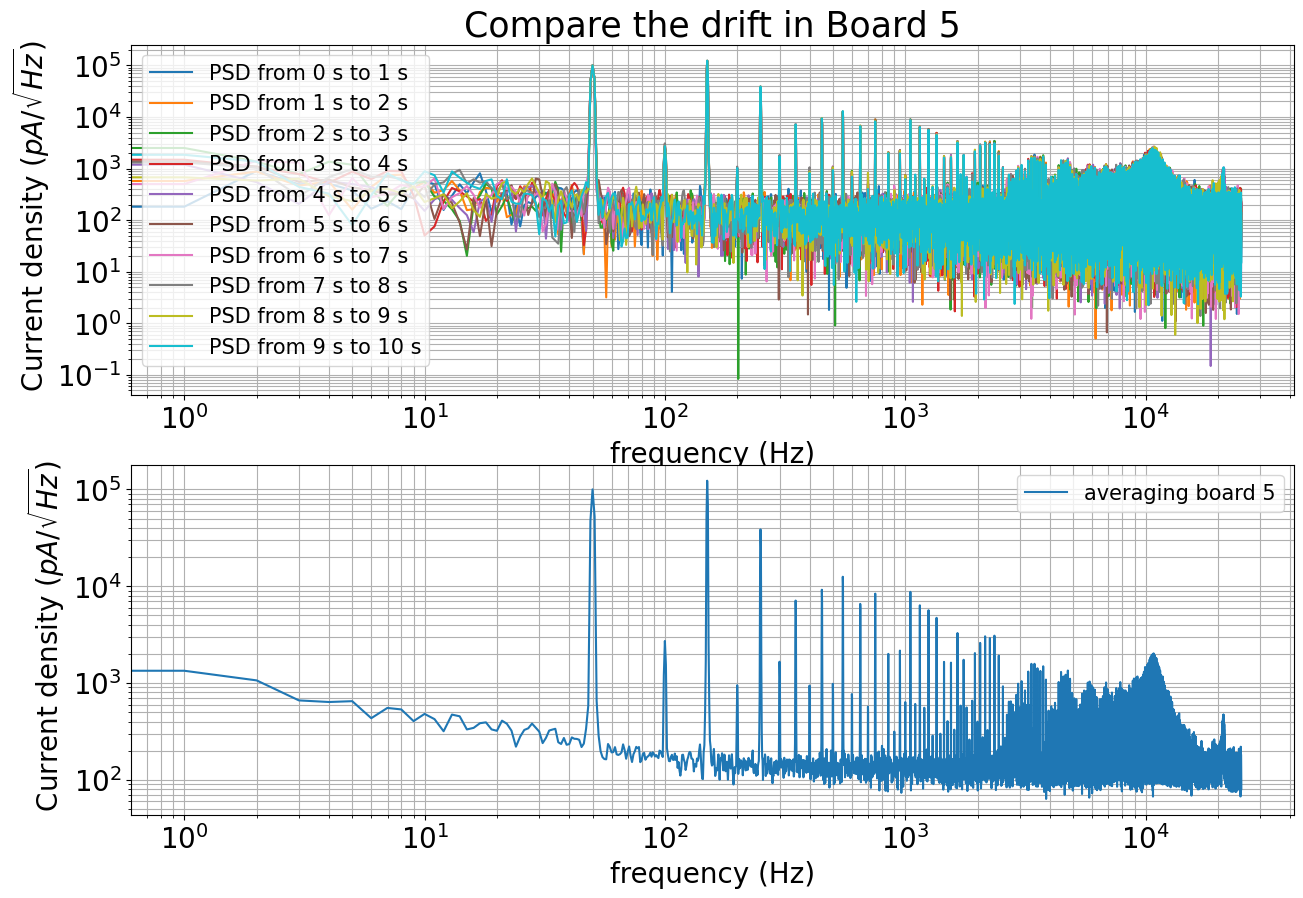

In [25]:
# test sample: data1 
factor = 1e12*2/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg5 = np.zeros(np.size(data5[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data5[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg5 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg5/10), label = f'averaging board 5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

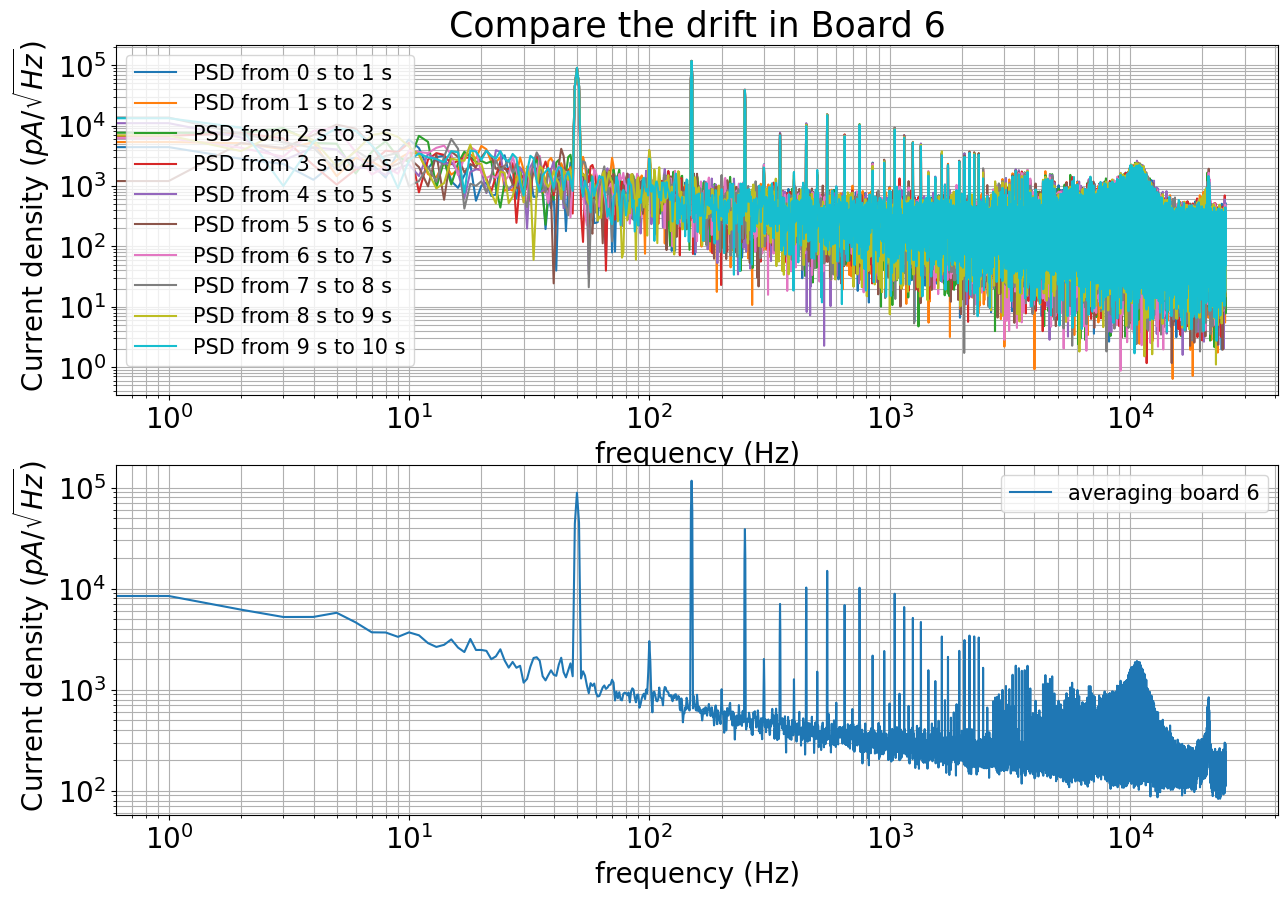

In [26]:
# test sample: data1 
factor = 1e12*2/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg6 = np.zeros(np.size(data6[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data6[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg6 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 6',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg6/10), label = f'averaging board 6')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### Compare again them and with TID data

Text(0.5, 1.0, 'current noise density computed by the time domain signal of DAC (avg)')

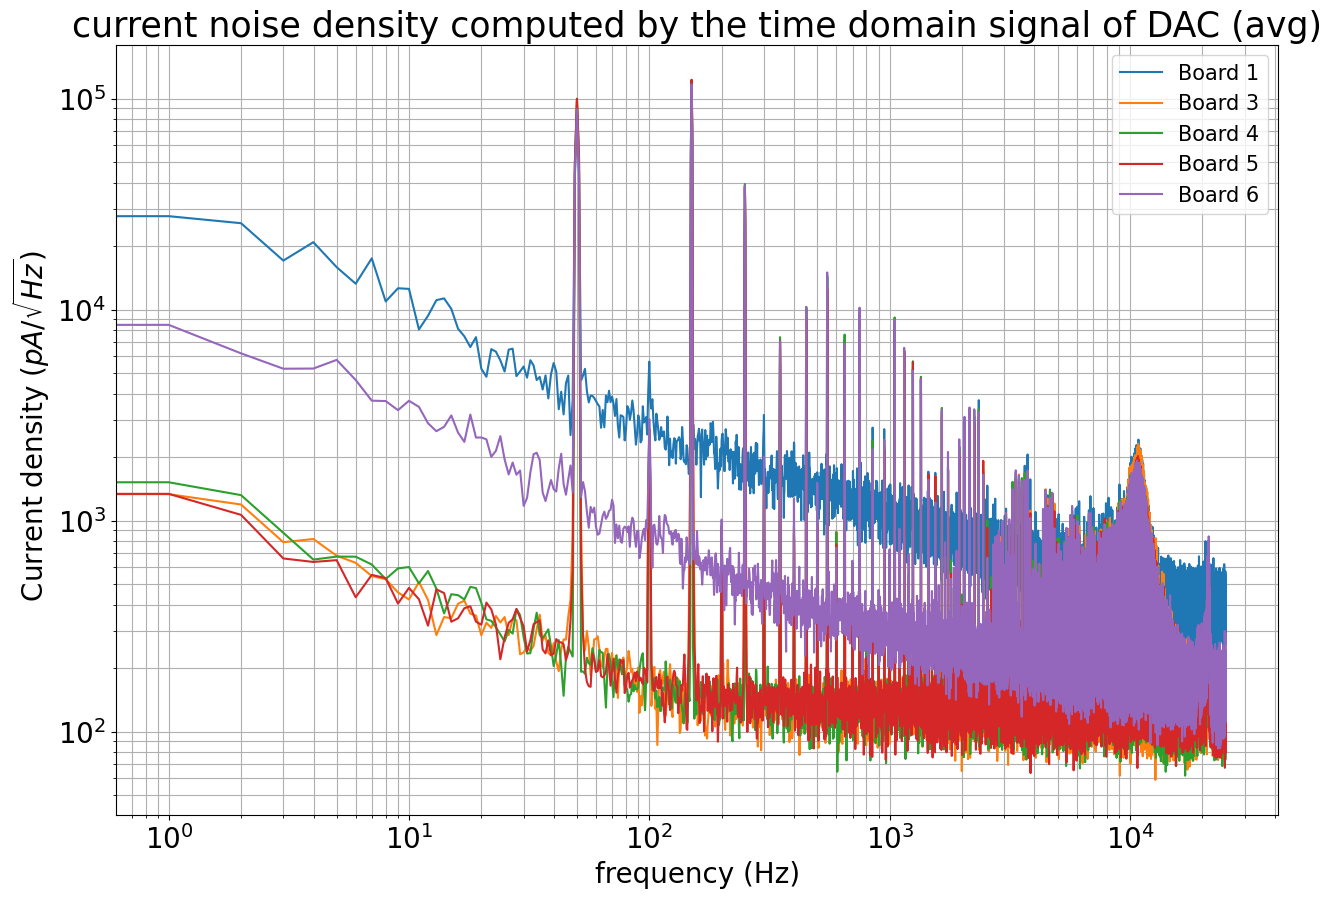

In [27]:
import matplotlib.pyplot as plt
num = [1,3,4,5,6]
avg = [avg1,avg3,avg4,avg5,avg6]
fre = compute_power_spectral_density(data6[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)[0]
plt.figure(figsize = (15,10))
for i in range(len(num)):
    plt.loglog(fre, np.sqrt(avg[i]/10), label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density computed by the time domain signal of DAC (avg)',fontsize = 25)

## Tesla vs Edison 

Goverment (CNES) gave them two the funding and AwaXe v4 (board 5). They have to measure the output noise of the DAC using different type of power source. 

### 1. Read data 

In [28]:
# Tesla 

B5LFPS = np.genfromtxt('dat/B5LFPS.TXT')
B5HFPS = np.genfromtxt('dat/B5HFPS.TXT')

# Tesla with filter  

B5LFFF = np.genfromtxt('dat/B5LFFF.TXT')
B5HFFF = np.genfromtxt('dat/B5HFFF.TXT')


# Edison 

B5LFBA = np.genfromtxt('dat/B5LFBA.TXT')
B5HFBA = np.genfromtxt('dat/B5HFBA.TXT')

#### 1.1. Plot tesla 

Text(0.5, 1.0, 'Current density measured in board 5 AwaXe v4')

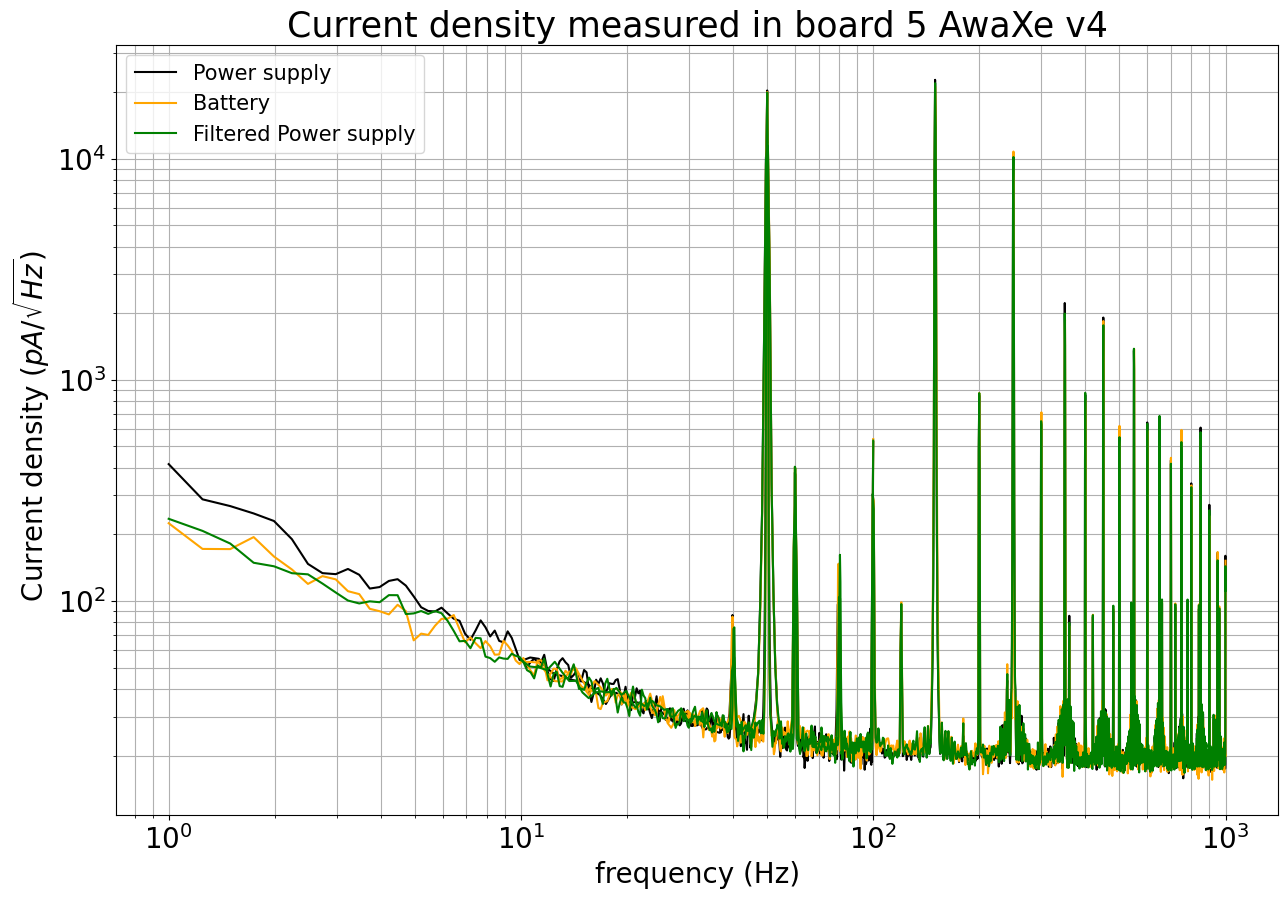

In [29]:
factor = 1e12*2/(510*1000)
plt.figure(figsize = (15,10))
# plt.subplot(211)
plt.loglog(B5LFPS[:,0], B5LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(B5HFPS[:,0], B5HFPS[:,1]*factor, color = color[0] )
plt.loglog(B5LFBA[:,0], B5LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(B5HFBA[:,0], B5HFBA[:,1]*factor, color = color[1] )
plt.loglog(B5LFFF[:,0], B5LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(B5HFFF[:,0], B5HFFF[:,1]*factor, color = color[2] )
n =  2
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Current density measured in board 5 AwaXe v4',fontsize = 25) 
# plt.savefig('the_war_of_power_source_in_DAC_measurent.png')
# plt.subplot(212)
# plt.loglog(fre,np.sqrt(avg6/10), label = f'averaging board 6')
# plt.xlabel('frequency (Hz)',fontsize = 20)
# plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.legend(fontsize = 15)
# plt.grid(True, which="both")

#### 1.2. Plot Edison

In [30]:
#noise squid

S4LFPS = np.genfromtxt('dat1/S4LFPS.TXT')
S4HFPS = np.genfromtxt('dat1/S4HFPS.TXT')

# Tesla with filter  

S4LFFF = np.genfromtxt('dat1/S4LFFF.TXT')
S4HFFF = np.genfromtxt('dat1/S4HFFF.TXT')


# Edison 

S4LFBA = np.genfromtxt('dat1/S4LFBA.TXT')
S4HFBA = np.genfromtxt('dat1/S4HFBA.TXT')

#noise TES

T4LFPS = np.genfromtxt('dat1/T4LFPS.TXT')
T4HFPS = np.genfromtxt('dat1/T4HFPS.TXT')

# Tesla with filter  

T4LFFF = np.genfromtxt('dat1/T4LFFF.TXT')
T4HFFF = np.genfromtxt('dat1/T4HFFF.TXT')


# Edison 

T4LFBA = np.genfromtxt('dat1/T4LFBA.TXT')
T4HFBA = np.genfromtxt('dat1/T4HFBA.TXT')

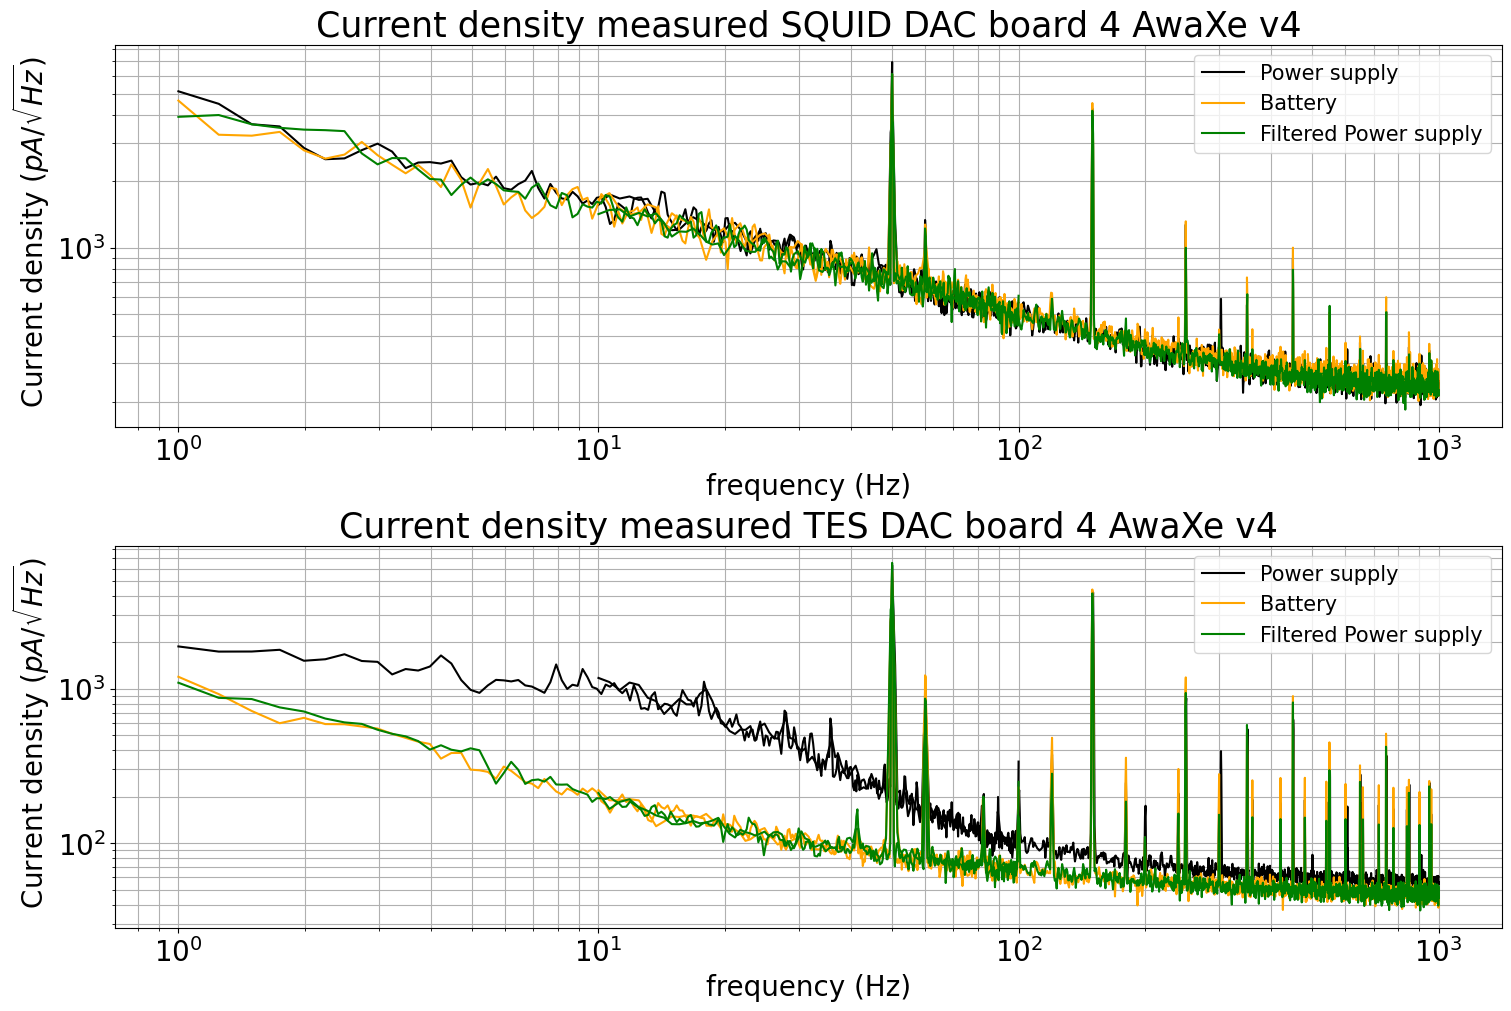

In [31]:
factor = 1e12*2/(510*1000)
plt.figure(figsize = (15,10), constrained_layout=True)
plt.subplot(211)
plt.loglog(S4LFPS[:,0], S4LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(S4HFPS[:,0], S4HFPS[:,1]*factor, color = color[0] )
plt.loglog(S4LFBA[:,0], S4LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(S4HFBA[:,0], S4HFBA[:,1]*factor, color = color[1] )
plt.loglog(S4LFFF[:,0], S4LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(S4HFFF[:,0], S4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured SQUID DAC board 4 AwaXe v4',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.subplot(212)
plt.loglog(T4LFPS[:,0], T4LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(T4HFPS[:,0], T4HFPS[:,1]*factor, color = color[0] )
plt.loglog(T4LFBA[:,0], T4LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(T4HFBA[:,0], T4HFBA[:,1]*factor, color = color[1] )
plt.loglog(T4LFFF[:,0], T4LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(T4HFFF[:,0], T4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured TES DAC board 4 AwaXe v4',fontsize = 25) 
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('DAC_SQUID_TES_v4_board4.png')

In [32]:
#extra result 
#noise squid

S3LFFF = np.genfromtxt('dat1/B3LFFF.TXT')
S3HFFF = np.genfromtxt('dat1/B3HFFF.TXT')

# Tesla with filter  

S1LFFF = np.genfromtxt('dat1/S1LFFF.TXT')
S1HFFF = np.genfromtxt('dat1/S1HFFF.TXT')


# Edison 

S4LFFF = np.genfromtxt('dat1/S4LFFF.TXT')
S4HFFF = np.genfromtxt('dat1/S4HFFF.TXT')

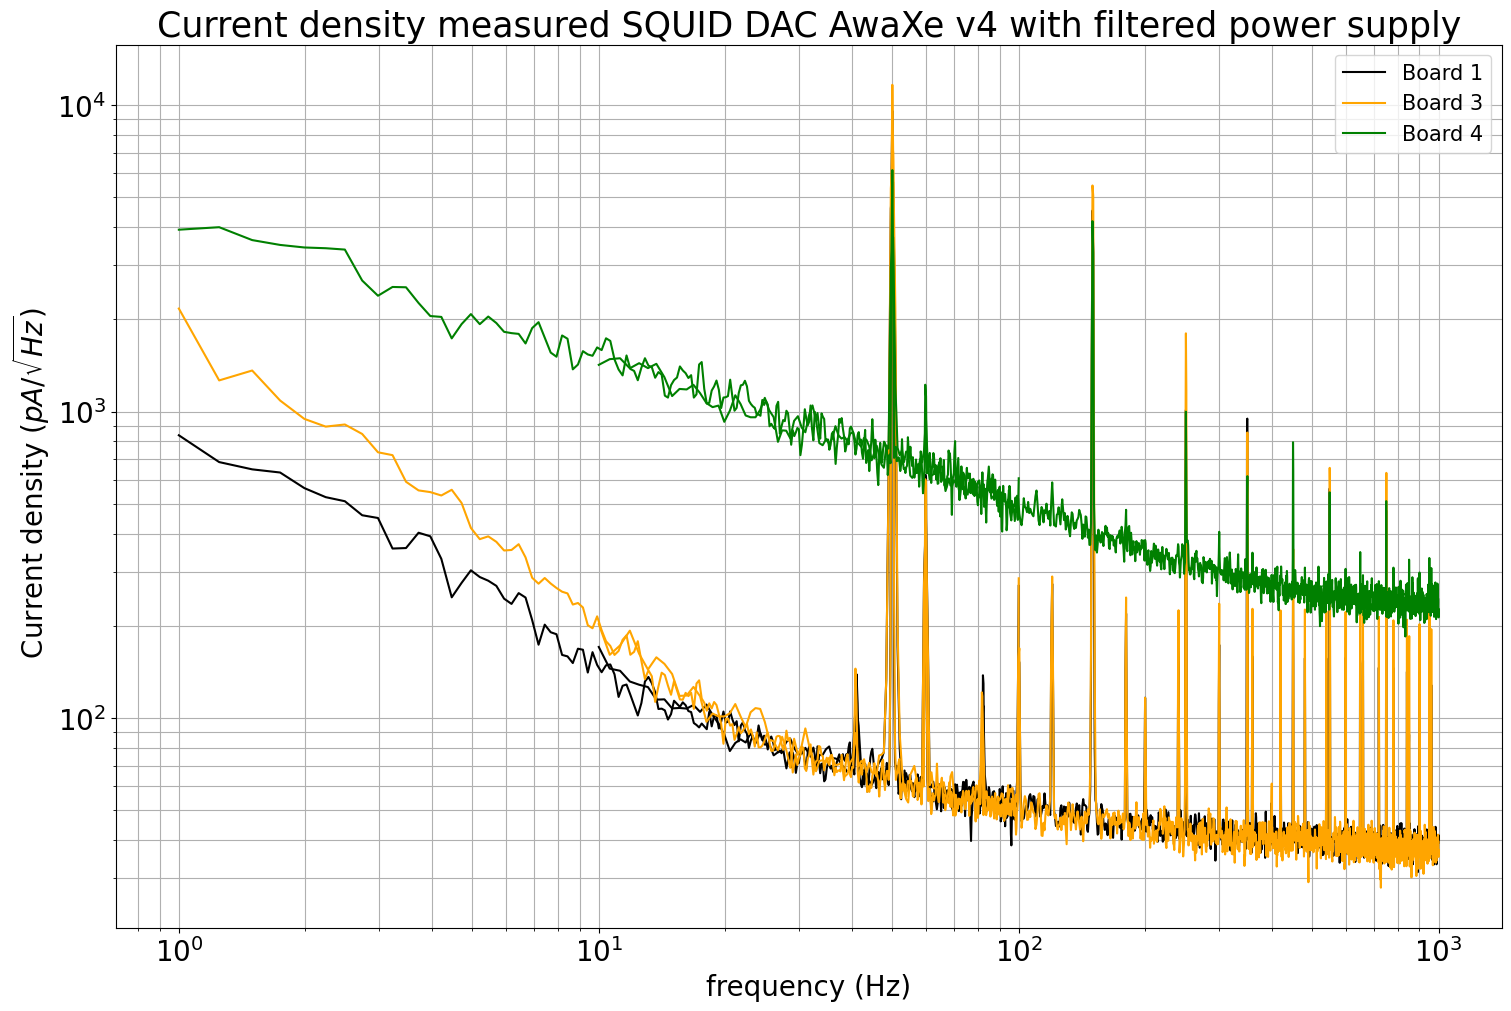

In [33]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)
plt.loglog(S1LFFF[:,0], S1LFFF[:,1]*factor, color = color[0], label = 'Board 1' )
plt.loglog(S1HFFF[:,0], S1HFFF[:,1]*factor, color = color[0] )
plt.loglog(S3LFFF[:,0], S3LFFF[:,1]*factor, color = color[1], label = 'Board 3' )
plt.loglog(S3HFFF[:,0], S3HFFF[:,1]*factor, color = color[1] )
plt.loglog(S4LFFF[:,0], S4LFFF[:,1]*factor, color = color[2], label = 'Board 4' )
plt.loglog(S4HFFF[:,0], S4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured SQUID DAC AwaXe v4 with filtered power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('DAC_SQUID_DAC_v4.png')

## AwaXe v4.5

### Read data (Board 3)  (Biased with power supply)

In [34]:
### TES_LF
TES1_LF = np.genfromtxt('v4.5/345T1LPS.TXT') 
TES2_LF = np.genfromtxt('v4.5/345T2LPS.TXT') 

### TES_HF
TES1_HF = np.genfromtxt('v4.5/345T1HPS.TXT') 
TES2_HF = np.genfromtxt('v4.5/345T2HPS.TXT')

### SQUID_LF
SQI1_LF = np.genfromtxt('v4.5/345S1LPS.TXT') 
SQI2_LF = np.genfromtxt('v4.5/345S2LPS.TXT')

### SQUID_HF
SQI1_HF = np.genfromtxt('v4.5/345S1HPS.TXT') 
SQI2_HF = np.genfromtxt('v4.5/345S2HPS.TXT')

### TES2_UF
TES2_UF = np.genfromtxt('v4.5/345T2UPS.TXT') 

### SQID2_UF
SQI2_UF = np.genfromtxt('v4.5/345S2UPS.TXT') 

### DATA to try compare 
SPECTRO_TES2 = np.genfromtxt('v4.5/CMPT2HPS.TXT')
SPECTRO_SQI2 = np.genfromtxt('v4.5/CMPS2HPS.TXT')

OSCILLO_TES2 = pd.read_csv('v4.5/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2 = pd.read_csv('v4.5/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

In [35]:
print(OSCILLO_TES2)

              0
0      0.004235
1      0.004479
2      0.003228
3      0.007397
4      0.002165
...         ...
79995  0.008140
79996  0.003604
79997  0.005731
79998  0.005148
79999  0.000462

[80000 rows x 1 columns]


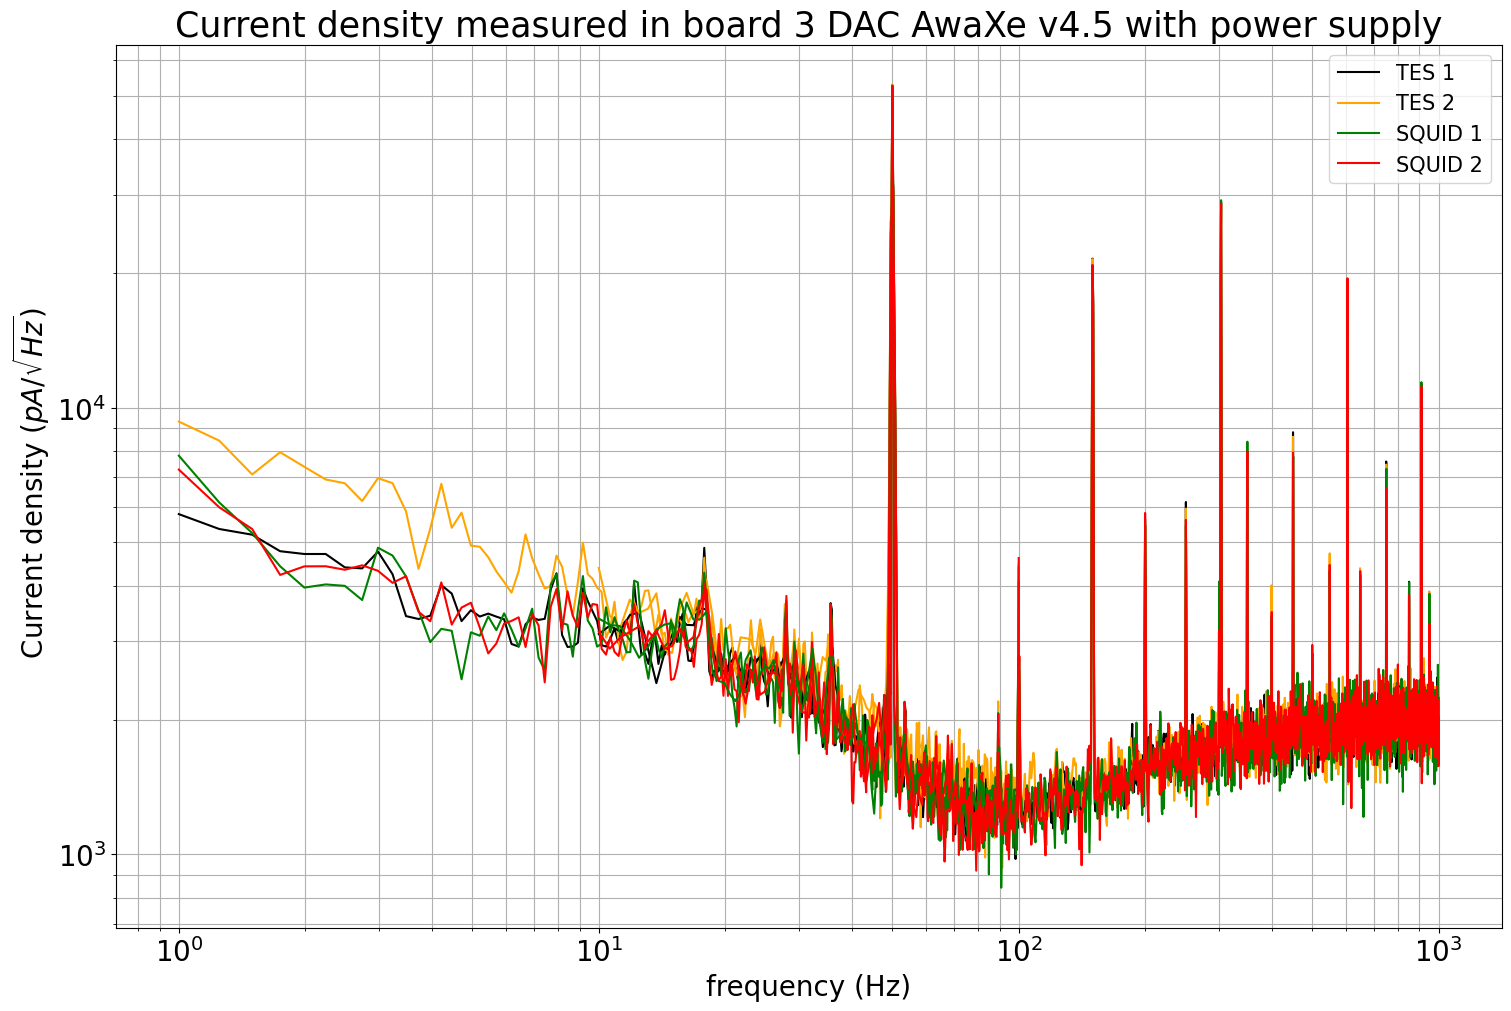

In [36]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('board3_v4.5_TES12_SQUID12.png')

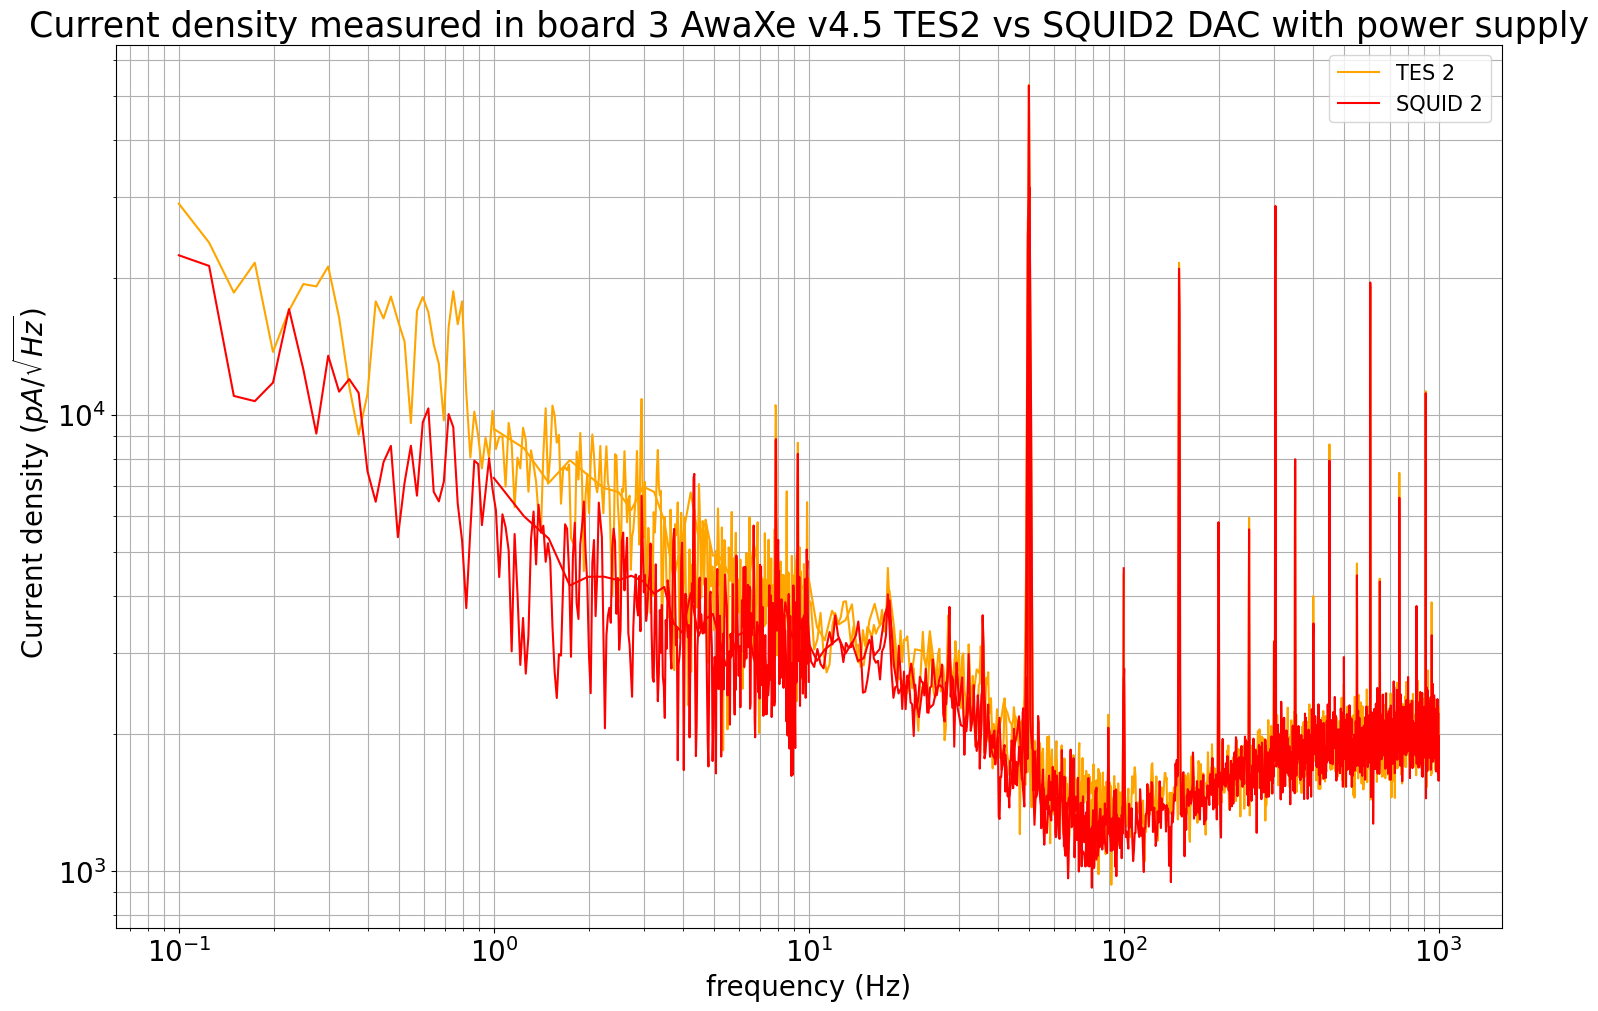

In [37]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)
#TES_UF 
plt.loglog(TES2_UF[:,0], TES2_UF[:,1]*factor, color = color[1])
#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQID_UF 
plt.loglog(SQI2_UF[:,0], SQI2_UF[:,1]*factor, color = color[3] )
#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('board3_v4.5_TES2_SQUID2_ultralownoise.png')

In [38]:
def compute_power_spectral_density(signal, sample_rate, nperseg, bandwidth):
    from scipy.signal import welch
    from scipy.signal.windows import hann
    """
    Computes the Power Spectral Density (PSD) of a given signal using Welch's method,
    considering the bandwidth of the oscilloscope.

    Parameters:
    signal (numpy array): The input signal.
    sample_rate (float): The sampling rate of the signal (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).
    bandwidth (float): Bandwidth of the oscilloscope (in Hz).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    psd (numpy array): Power Spectral Density at each frequency.
    """

    # Apply a Hanning window to the signal
    window = hann(nperseg)
    signal = signal * window

    # Compute the Power Spectral Density using Welch's method
    freq, psd = welch(signal, sample_rate, nperseg=nperseg)

    # Consider the oscilloscope's bandwidth
    valid_indices = freq <= bandwidth / 2  # Keep only frequencies within bandwidth
    freq = freq[valid_indices]
    psd = psd[valid_indices]

    return freq, psd

In [39]:
# from scipy.signal import welch 
# from scipy.signal.windows import hann 
# ?welch

In [40]:
sample_rate = 20000
ft1,val1 = compute_power_spectral_density(OSCILLO_TES2[0]*factor, sample_rate, 80000, 20e6)
ft2,val2 = compute_power_spectral_density(OSCILLO_SQI2[0]*factor, sample_rate, 80000, 20e6)

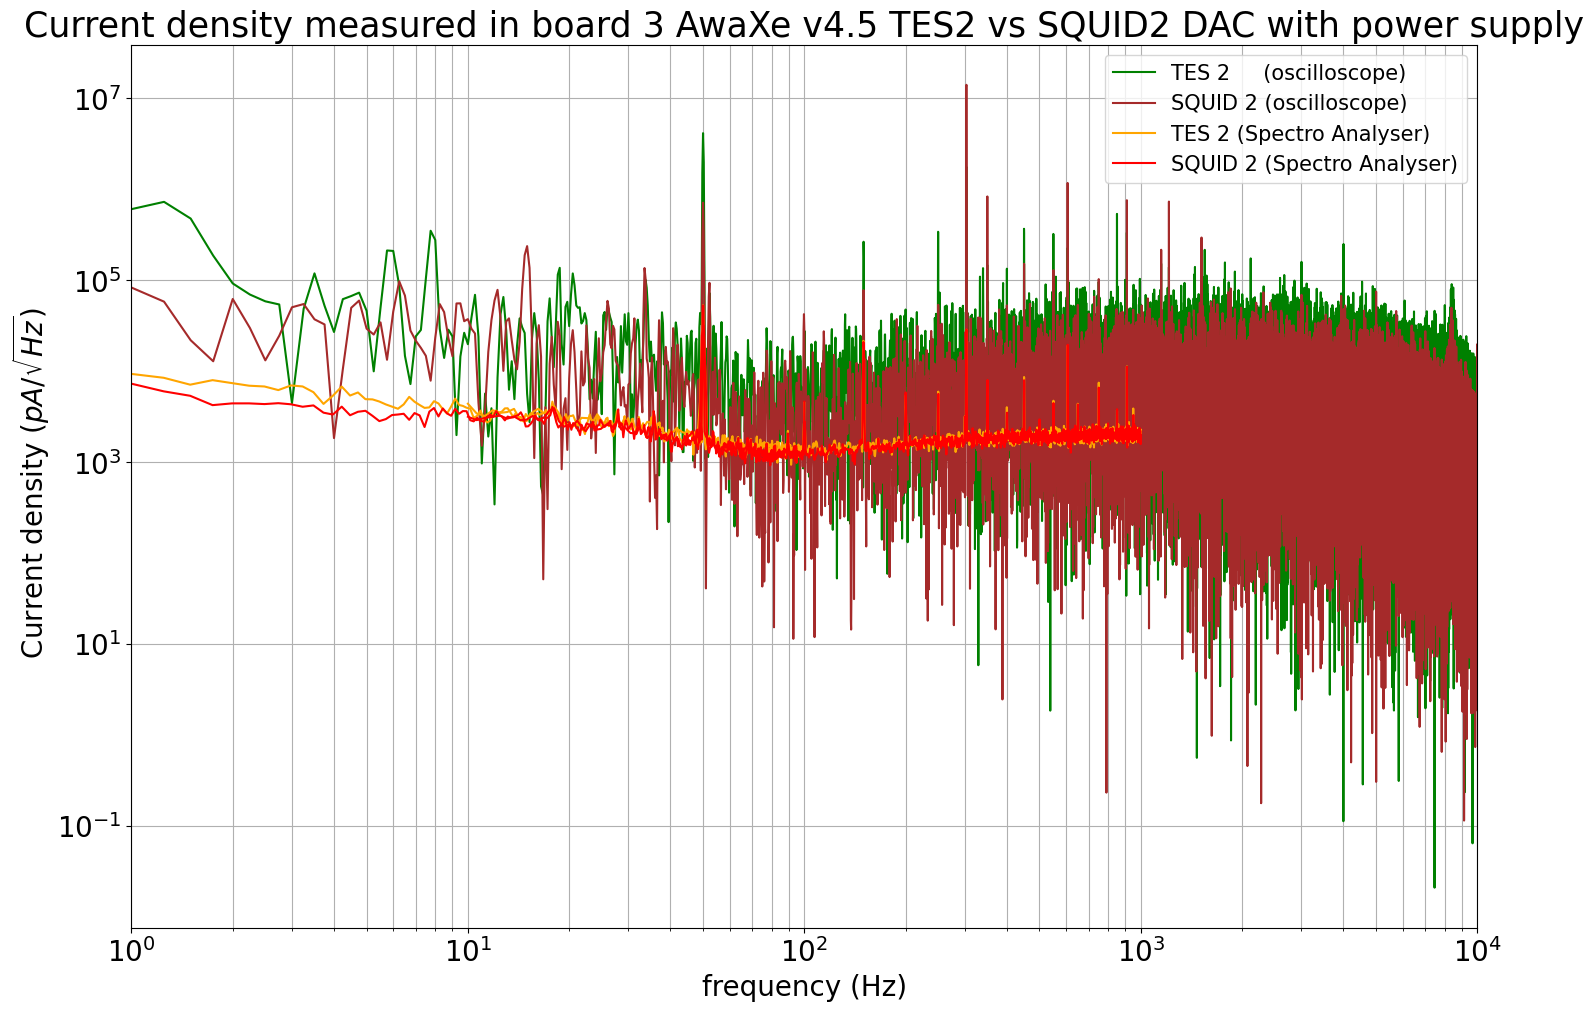

In [41]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

# #TES_LF 
# plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
# #TES_HF 
# plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

# #SQUID_LF 
# plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
# #SQUID_HF 
# plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

#Oscilloscope 
plt.loglog(ft1,val1, color = color[2], label = 'TES 2     (oscilloscope)')
plt.loglog(ft2,val2, color = color[4], label = 'SQUID 2 (oscilloscope)')

#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 (Spectro Analyser)' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 (Spectro Analyser)' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.xlim(1,1e4)
plt.savefig('spectrum_compare.png')

### Read data (board 3) (Biased with batteries)

In [211]:
### TES_LF
TES1BA_LF = np.genfromtxt('v4.5_20122024/345T1LBA.TXT') 
TES2BA_LF = np.genfromtxt('v4.5_20122024/345T2LBA.TXT') 
TES1BA_HF = np.genfromtxt('v4.5_20122024/345T1HBA.TXT') 
TES2BA_HF = np.genfromtxt('v4.5_20122024/345T2HBA.TXT')
SQI1BA_LF = np.genfromtxt('v4.5_20122024/345S1LBA.TXT') 
SQI2BA_LF = np.genfromtxt('v4.5_20122024/345S2LBA.TXT')
SQI1BA_HF = np.genfromtxt('v4.5_20122024/345S1HBA.TXT') 
SQI2BA_HF = np.genfromtxt('v4.5_20122024/345S2HBA.TXT')
TES2BA_UF = np.genfromtxt('v4.5_20122024/345T2UBA.TXT')
TES2BA_UF = np.genfromtxt('v4.5_20122024/345T2UBA.TXT') 
SQI2BA_UF = np.genfromtxt('v4.5_20122024/345S2UBA.TXT') 
TES1BA_UF = np.genfromtxt('v4.5_20122024/345T1UBA.TXT') 
SQI1BA_UF = np.genfromtxt('v4.5_20122024/345S1UBA.TXT') 
# ### DATA to try compare 
# SPECTRO_TES2 = np.genfromtxt('v4.5/CMPT2HPS.TXT')
# SPECTRO_SQI2 = np.genfromtxt('v4.5/CMPS2HPS.TXT')

# OSCILLO_TES2 = pd.read_csv('v4.5/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
# OSCILLO_SQI2 = pd.read_csv('v4.5/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

NameError: name 'factor' is not defined

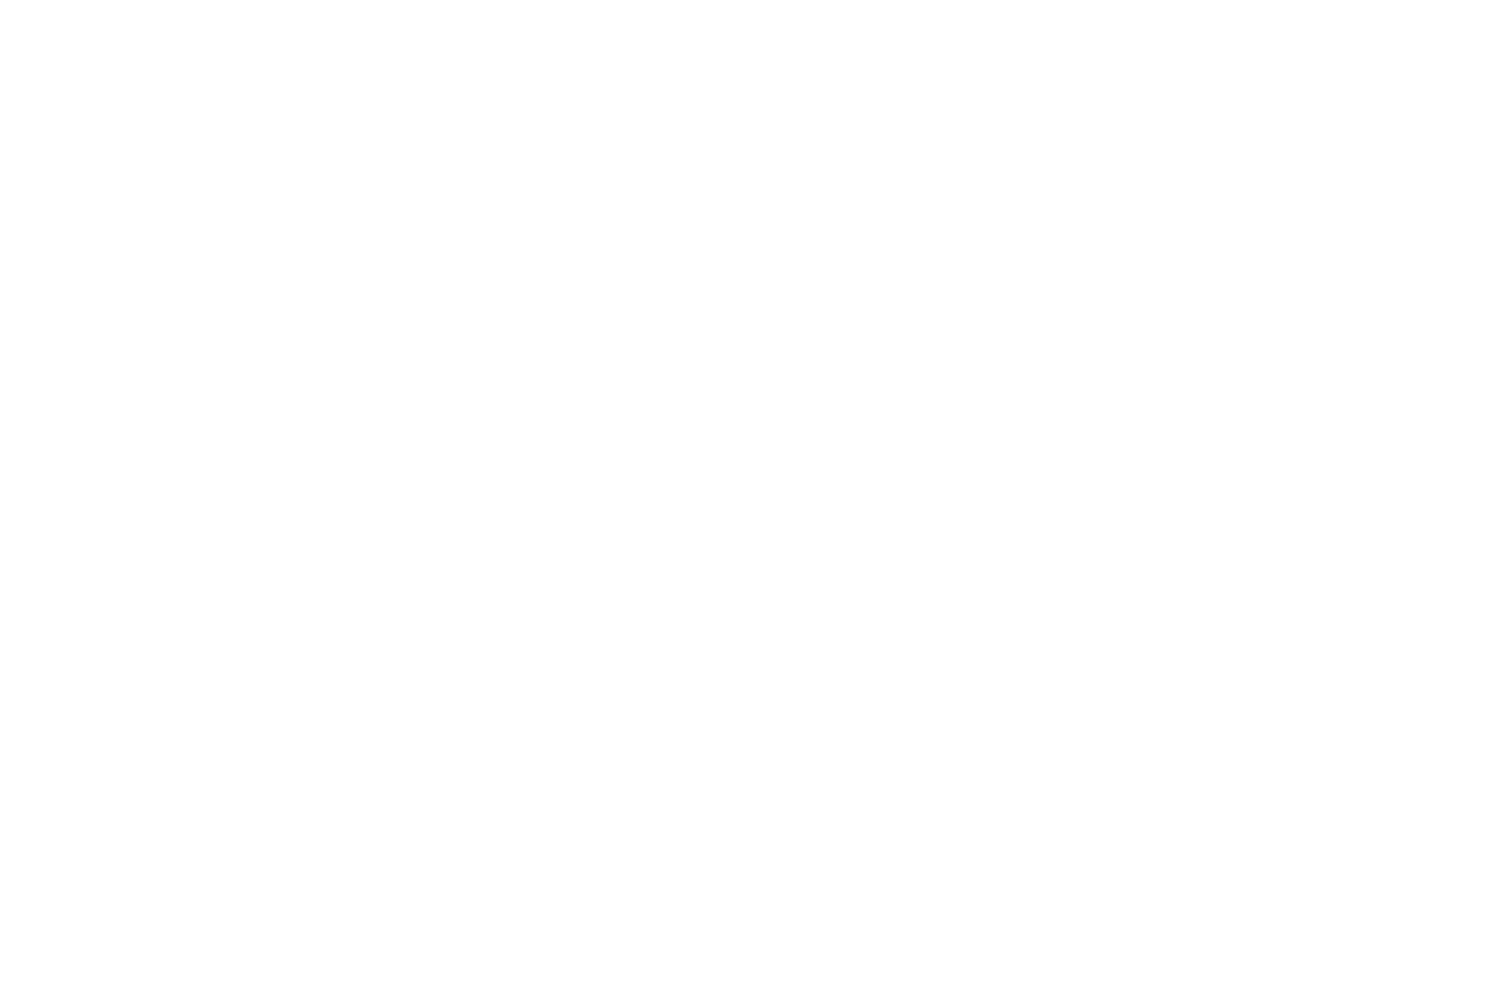

In [212]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_UF[:,0], TES1BA_UF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_UF[:,0], TES2BA_UF[:,1]*factor, color = color[1] )
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor, color = color[1], label = 'TES 2' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor, color = color[1] )

plt.loglog(SQI1BA_UF[:,0], SQI1BA_UF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_UF[:,0], SQI2BA_UF[:,1]*factor, color = color[3] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor, color = color[3] )



plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with Batteries',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

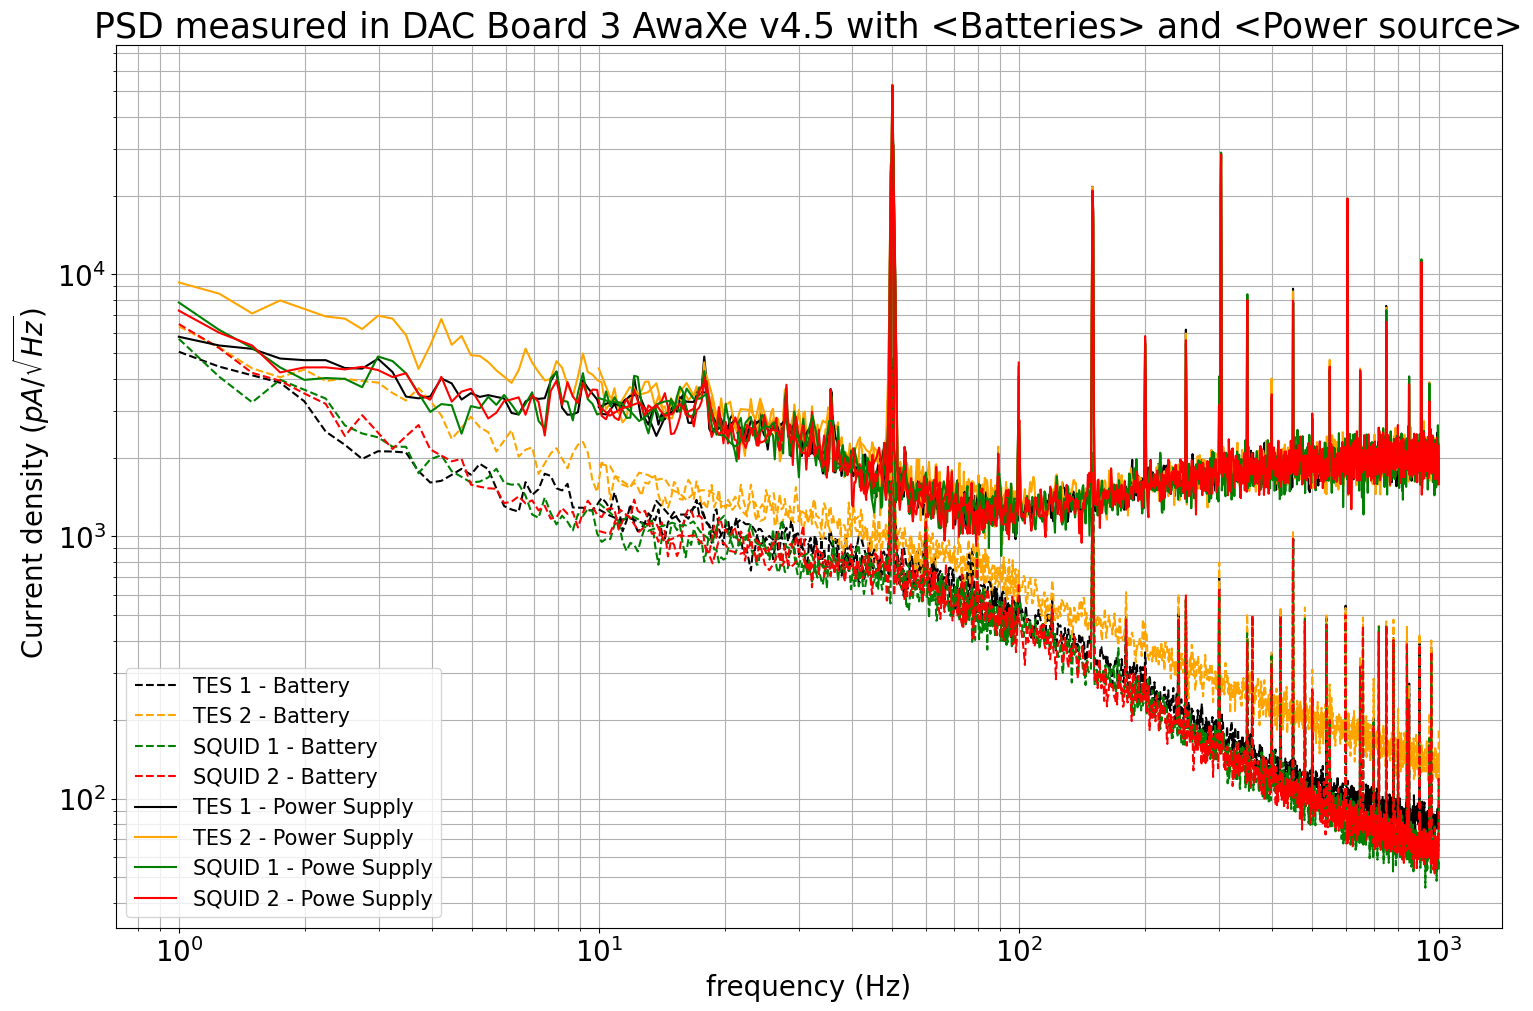

In [102]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[0], label = 'TES 1 - Battery' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[1], label = 'TES 2 - Battery' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[1] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[2], label = 'SQUID 1 - Battery' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[3], label = 'SQUID 2 - Battery' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[3] )

#------

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - Power Supply' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - Power Supply' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - Powe Supply' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - Powe Supply' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

plt.gca().set_title('PSD measured in DAC Board 3 AwaXe v4.5 with <Batteries> and <Power source>',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

In [84]:
### Oscilloscope 

OSCILLO_TES2BA = pd.read_csv('v4.5_20122024/345t2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2BA = pd.read_csv('v4.5_20122024/345s2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_TES1BA = pd.read_csv('v4.5_20122024/345t1ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI1BA = pd.read_csv('v4.5_20122024/345s1ba.Wfm.csv', skiprows=0, header=None) # No header

In [85]:
OSCILLO_analyse = [OSCILLO_TES2BA,
OSCILLO_SQI2BA,
OSCILLO_TES1BA,
OSCILLO_SQI1BA]

In [86]:
len(OSCILLO_TES2BA)

400000

In [87]:
def compute_power_spectral_density(signal, sample_rate, nperseg, bandwidth):
    from scipy.signal import welch
    from scipy.signal.windows import hann
    """
    Computes the Power Spectral Density (PSD) of a given signal using Welch's method,
    considering the bandwidth of the oscilloscope.

    Parameters:
    signal (numpy array): The input signal.
    sample_rate (float): The sampling rate of the signal (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).
    bandwidth (float): Bandwidth of the oscilloscope (in Hz).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    psd (numpy array): Power Spectral Density at each frequency.
    """

    # Apply a Hanning window to the signal
    window = hann(len(signal))
    
    signal = np.array(signal) * window

    # Compute the Power Spectral Density using Welch's method
    freq, psd = welch(signal, sample_rate, nperseg=nperseg)

    # Consider the oscilloscope's bandwidth
    valid_indices = freq <= bandwidth / 2  # Keep only frequencies within bandwidth
    freq = freq[valid_indices]
    psd = psd[valid_indices]

    return freq, psd

def PSD_avg(data, Fs, BW, nperseg):  # Added nperseg argument
    """
    Computes the average Power Spectral Density (PSD) of a given signal 
    over multiple segments.

    Parameters:
    data (numpy array): The input signal.
    Fs (float): The sampling rate of the signal (in Hz).
    BW (float): Bandwidth of the oscilloscope (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    avg_psd (numpy array): Average Power Spectral Density at each frequency.
    """
    L = len(data)
    n = int(L / Fs) 
    # print(n)
    psd_sum = np.zeros(L // n // 2 +1)  # Initialize array to store PSD sum
    print(np.size(psd_sum))
    count = 0
    for i in range(n):
        # print(i)
        fre, val = compute_power_spectral_density(data[count:count + Fs], Fs, nperseg, BW)
        psd_sum += val 
        count += Fs

    avg_psd = psd_sum / n
    return fre, avg_psd  # Return the frequency array from the last segment
        



In [88]:
Fs = 20000
BW = 20e6
# f,va = PSD_avg(OSCILLO_TES2BA[0], Fs, BW, 20000)

10001
10001
10001
10001


/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_24877/1473736466.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


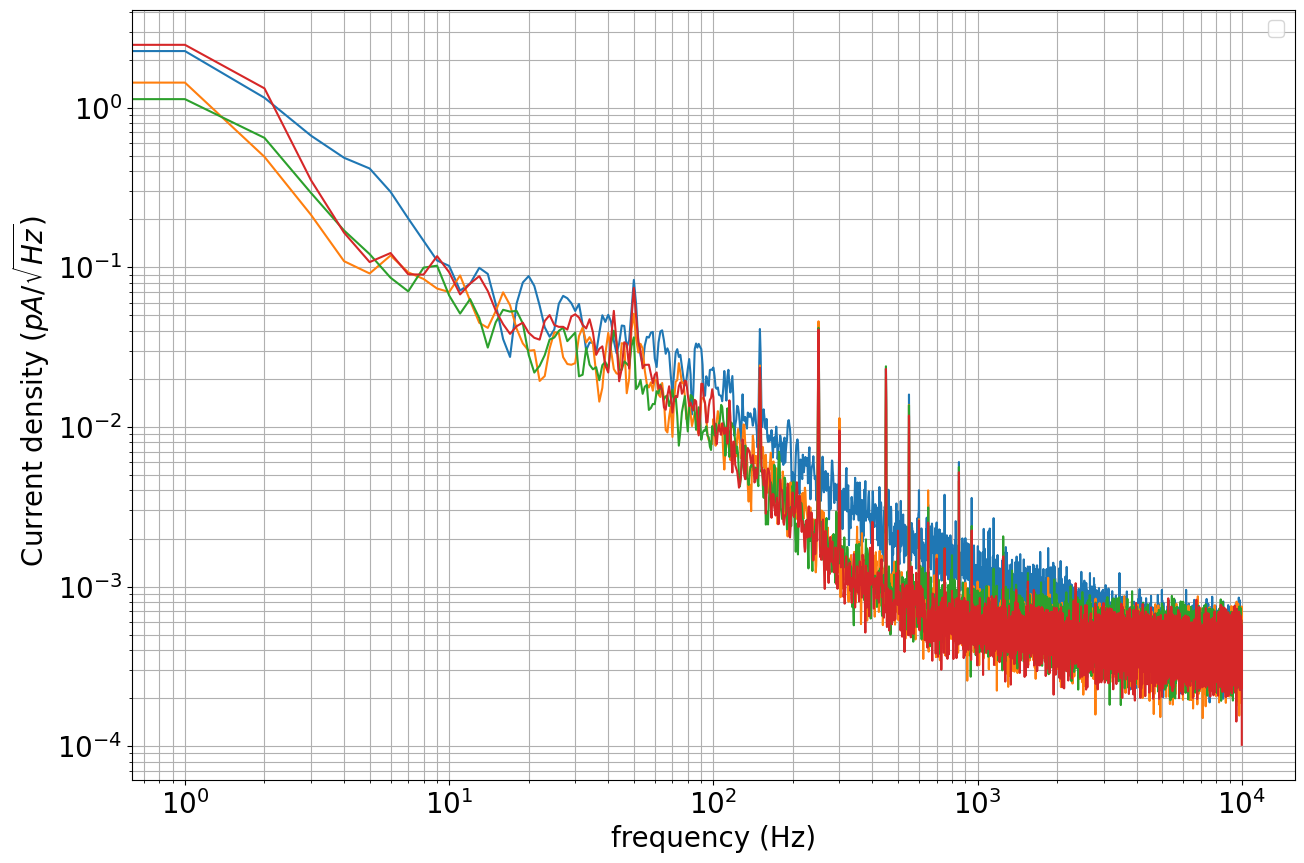

In [94]:
plt.figure(figsize = (15,10))
for i in range(len(OSCILLO_analyse)):
    f,va = PSD_avg(OSCILLO_analyse[i][0], Fs, BW, 20000)
    plt.loglog(f,va*factor)
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

## CMB S4 Board 3

In [97]:
### TES_LF
CMB_TES1PS_LF = np.genfromtxt('cmbs4_20122024/CMBT0LPS.TXT') 
CMB_TES2PS_LF = np.genfromtxt('cmbs4_20122024/CMBT1LPS.TXT') 

CMB_TES1PS_HF = np.genfromtxt('cmbs4_20122024/CMBT0HPS.TXT') 
CMB_TES2PS_HF = np.genfromtxt('cmbs4_20122024/CMBT1HPS.TXT')

CMB_SQI1PS_LF = np.genfromtxt('cmbs4_20122024/CMBS0LPS.TXT') 
CMB_SQI2PS_LF = np.genfromtxt('cmbs4_20122024/CMBS1LPS.TXT')

CMB_SQI1PS_HF = np.genfromtxt('cmbs4_20122024/CMBS0HPS.TXT') 
CMB_SQI2PS_HF = np.genfromtxt('cmbs4_20122024/CMBS1HPS.TXT')

CMB_TES2PS_UF = np.genfromtxt('cmbs4_20122024/CMBT1UPS.TXT')
CMB_TES2PS_UF = np.genfromtxt('cmbs4_20122024/CMBT1UPS.TXT')

CMB_SQI2PS_UF = np.genfromtxt('cmbs4_20122024/CMBS1UPS.TXT') 
CMB_TES1PS_UF = np.genfromtxt('cmbs4_20122024/CMBT0UPS.TXT') 

 

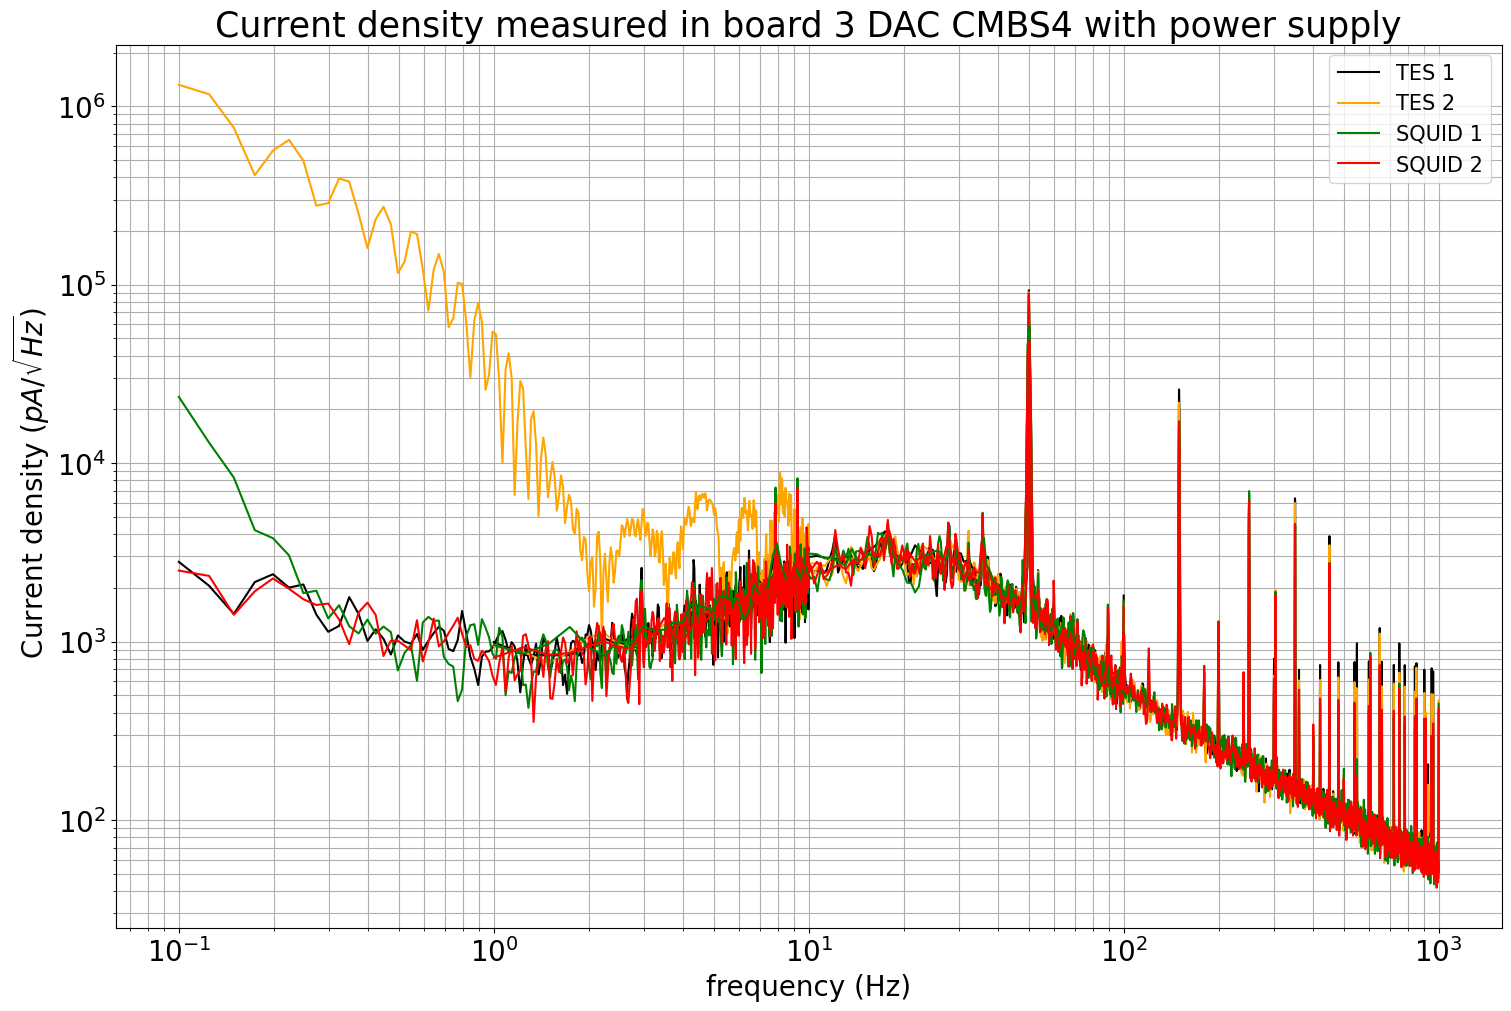

In [107]:
#TES_LF 
plt.figure(figsize = (15,10), constrained_layout=True)
plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, color = color[1], label = 'TES 2' )

plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, color = color[1] )

plt.loglog(CMB_SQI1PS_UF[:,0], CMB_SQI1PS_UF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_UF[:,0], CMB_SQI2PS_UF[:,1]*factor, color = color[3] )

plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )

plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC CMBS4 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('CMBS4noise_powersupply.png')

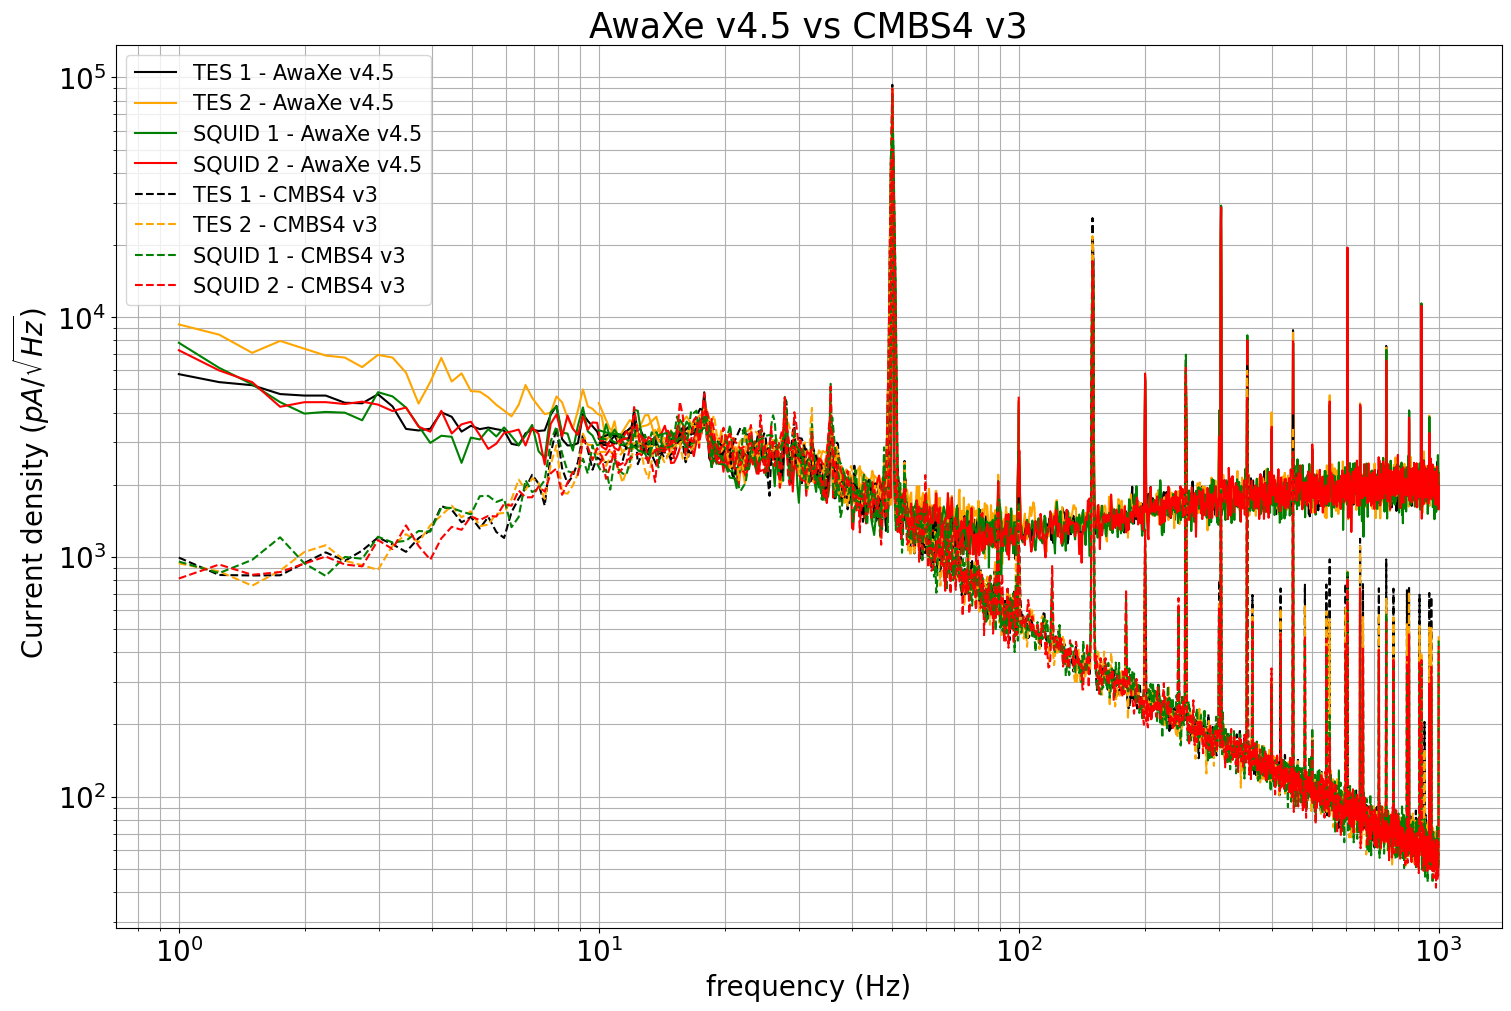

In [106]:
plt.figure(figsize = (15,10), constrained_layout=True)
#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - AwaXe v4.5' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - AwaXe v4.5' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - AwaXe v4.5' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - AwaXe v4.5' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )



# plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
# plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[0], label = 'TES 1 - CMBS4 v3' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[1], label = 'TES 2 - CMBS4 v3' )
plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[1] )
plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[2], label = 'SQUID 1 - CMBS4 v3' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[3], label = 'SQUID 2 - CMBS4 v3' )
plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[3] )


plt.gca().set_title('AwaXe v4.5 vs CMBS4 v3',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('AWaXev4.5vsCMBS4v3.png')



# Appendix

## Plot other noise

### DACv4.5board2 measure 1

In [51]:
data = pd.read_csv('06112024/C1--dacv45bord2--00000.csv', skiprows=9, header=None) # No header
data_ms1 = data

In [52]:
# FS = 1000
#(Gain SR560 = 1000 ; /2 at the input of the oscilloscope, load = 510Ω) 
fac = 1e12*2/(510*1000) 
#1e12 to convert to pA
# *2 due to the division by the oscilloscope 
# 510 * 1000 due to the load 


N =  1/(data[0][1] - data[0][0])
print(f'N = {N}')
fre, val = compute_power_spectral_density(data[1]*fac, N, 50002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data[0],data[1]*fac, label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre, np.sqrt(val), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data[0][1] - data[0][0]))
print(np.size(fre))

N = 2497.5024975013157


TypeError: compute_power_spectral_density() missing 1 required positional argument: 'bandwidth'

In [ ]:
# test sample: data1 
factor = fac
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg = np.zeros(np.size(data[0][data_selection(i,i+1, data[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data[1][data_selection(i,i+1, data[0])]*fac, N, 2500)
    avg += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in board 2 DACv4.5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg/10), label = f'averaging board 2 DACv4.5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### DACv4.5 board2 measure 2

In [ ]:
data = pd.read_csv('06112024/C1--dacv45bord2--00001.csv', skiprows=9, header=None) # No header
data_ms2 = data

In [ ]:
# FS = 1000
fac = 1e12/(2*500000) #factor divided by 2


N =  1/(data[0][1] - data[0][0])
print(f'N = {N}')
fre, val = compute_power_spectral_density(data[1]*fac, N, 50002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data[0],data[1]*fac, label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre, np.sqrt(val), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data[0][1] - data[0][0]))
print(np.size(fre))

In [ ]:
# test sample: data1 
factor = fac
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg = np.zeros(np.size(data[0][data_selection(i,i+1, data[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data[1][data_selection(i,i+1, data[0])]*fac, N, 2500)
    avg += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in board 2 DACv4.5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg/10), label = f'averaging board 2 DACv4.5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

## Horacio

In [147]:
### Oscilloscope 

tes1 = pd.read_csv('v4.5_20122024/345t1ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
tes2 = pd.read_csv('v4.5_20122024/345t2ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
sq1 = pd.read_csv('v4.5_20122024/345s1ba.Wfm.csv', skiprows=0, header=None, names=['amp'])
sq2 = pd.read_csv('v4.5_20122024/345s2ba.Wfm.csv', skiprows=0, header=None, names=['amp'])

In [148]:
Fs=20e3           #sampling frequency 
Ts=1/Fs           #resolution
ctime=Ts*mem_len  #capture time
delta_f = 1/ctime #delta f
N=int(Fs*ctime)   #memory lenght/record lenght
t=np.arange(N)*Ts
span=(1/2.0)*Fs   #frequency span
gain=(1000*510)   #(Gain SR560 = 1000 ;  load = 510Ω)
print(f'{N}, {delta_f} Hz, {Ts} s, {span} Hz, {ctime} s')

400000, 0.05 Hz, 5e-05 s, 10000.0 Hz, 20.0 s


## Samples in time-domain

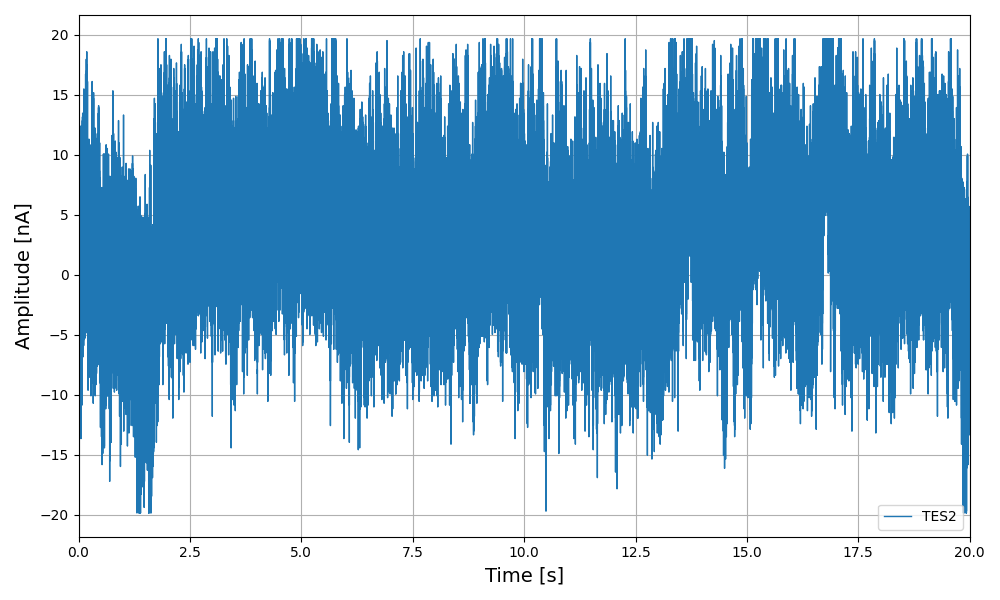

In [176]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax.plot(t,(tes2['amp']/gain)*1e9, lw=1.0,label='TES2')
ax.legend()
ax.set_xlabel('Time [s]',fontsize=14)
ax.set_ylabel('Amplitude [nA]',fontsize=14)
ax.grid()
ax.set_xlim(0,N*Ts)
plt.tight_layout()
plt.savefig('plots/tdomain_tes2.png')

In [187]:
nfft = N
win  = sg.windows.boxcar(nfft)
print(len(win),len(tes2))
[f,pxx]= sg.welch(tes2['amp']/gain,fs=Fs,window=win,nfft=nfft,detrend=False) # W/Hz power spectral density
IdB_Hz = 10*np.log10(np.sqrt(pxx)) # dBI/sqrt{Hz}
IdB_bin= 10*np.log10(np.sqrt(pxx*Fs/nfft)) # dBI/sqrt{bin}

400000 400000


-77.99870203419144


/tmp/ipykernel_27611/1762870143.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


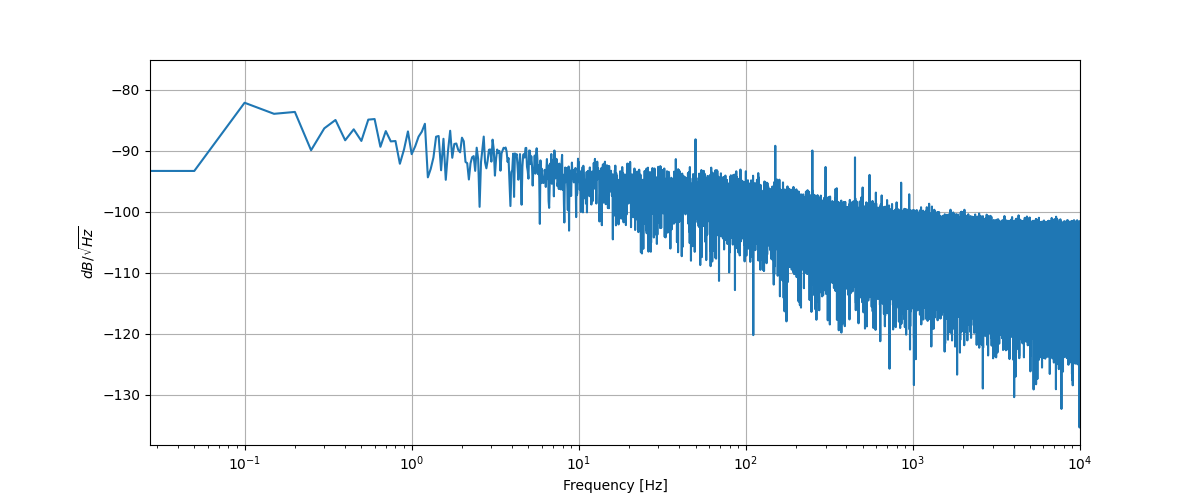

In [188]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,IdB_Hz);
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz}$');
print(max(PdB_Hz))

/tmp/ipykernel_27611/430690394.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


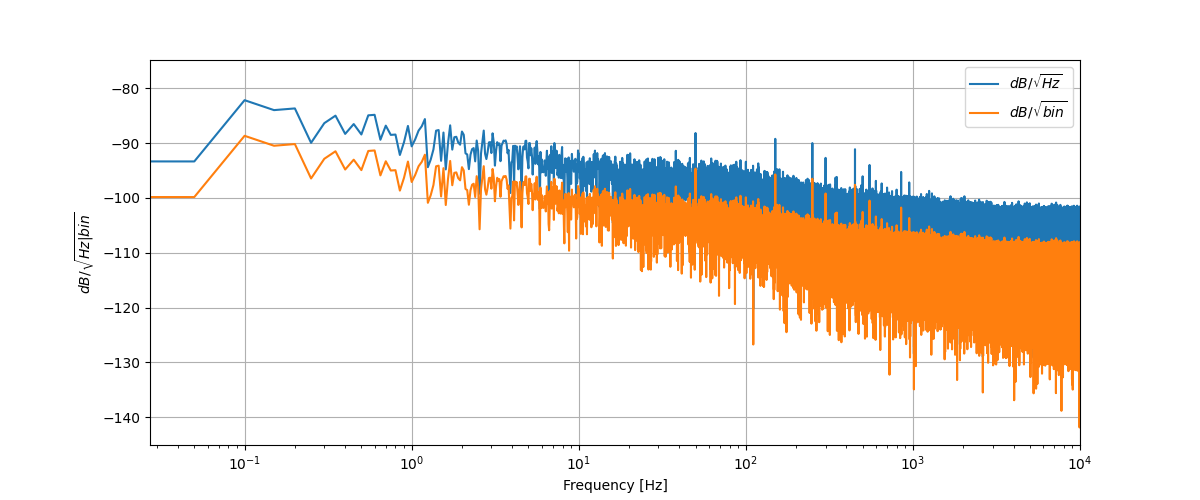

In [190]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,PdB_Hz, label=r'$dB/\sqrt{Hz}$')
ax.semilogx(f,PdB_bin, label=r'$dB/\sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz|bin}$');
plt.legend()

In [191]:
PW_Hz = np.sqrt(pxx) # I/sqrt{Hz}
PW_bin= np.sqrt(pxx*Fs/nfft) # I/sqrt{bin}

/tmp/ipykernel_27611/2598634915.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


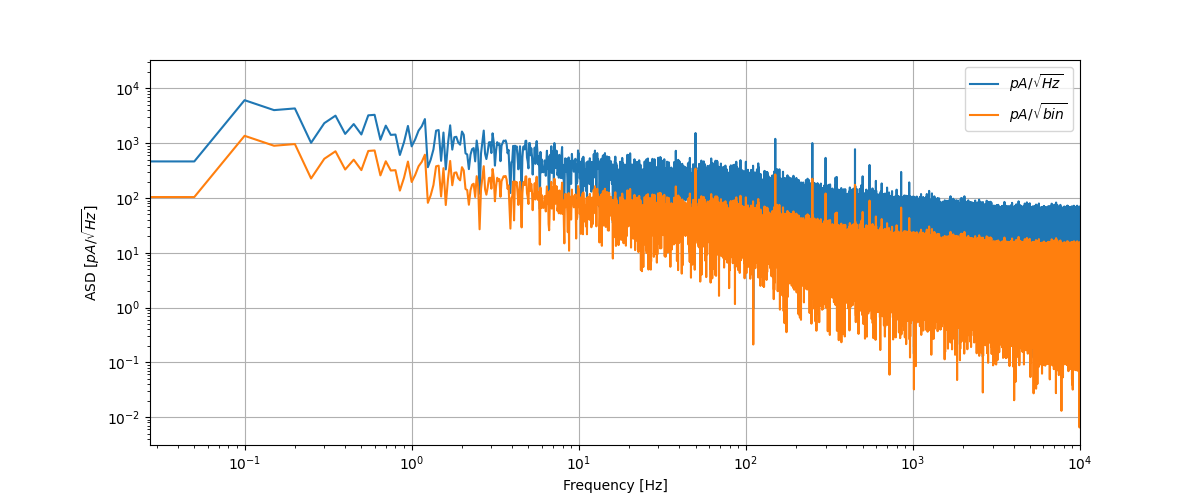

In [192]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,PW_Hz*1e12, label=r'$pA/ \sqrt{Hz}$')
ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$pA/ \sqrt{Hz}$]')
plt.legend()

Now let's check with the amplitude spectrum

In [220]:
nfft = N
win  = sg.windows.boxcar(nfft)
print(len(win),len(tes2))
[f,ixx]= sg.welch(tes2['amp']/gain,fs=Fs,window=win,nfft=nfft,scaling='spectrum',detrend=False) # W/Hz power spectral density
IdB_Hz = 10*np.log10(np.sqrt(ixx/delta_f)) # dBI/sqrt{Hz}
IdB_bin= 10*np.log10(np.sqrt((ixx/delta_f)*Fs/nfft)) # dBI/sqrt{bin}

400000 400000


/tmp/ipykernel_27611/430690394.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


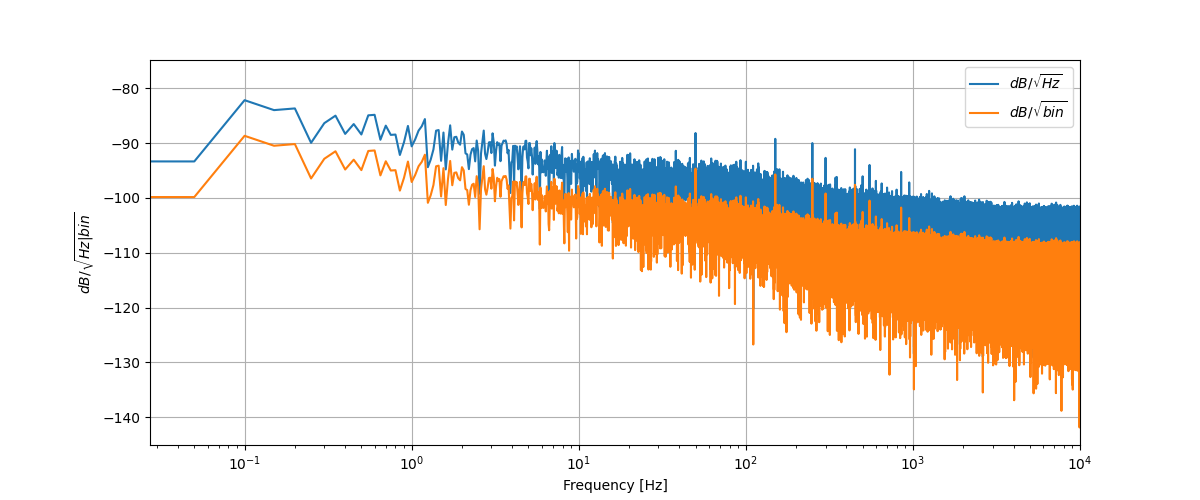

In [221]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.semilogx(f,PdB_Hz, label=r'$dB/\sqrt{Hz}$')
ax.semilogx(f,PdB_bin, label=r'$dB/\sqrt{bin}$')
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]');
ax.set_ylabel(r'$dB/\sqrt{Hz|bin}$');
plt.legend()

In [222]:
PW_Hz = np.sqrt(ixx/delta_f) # I/sqrt{Hz}
PW_bin= np.sqrt((ixx/delta_f)*Fs/nfft) # I/sqrt{bin}

/tmp/ipykernel_27611/3300280698.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,span)


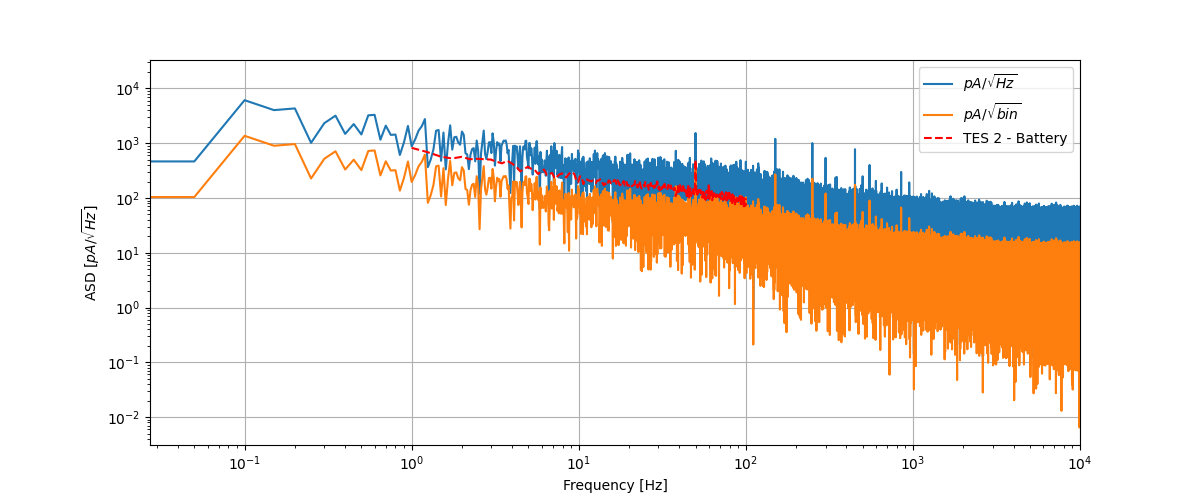

In [223]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))
ax.loglog(f,PW_Hz*1e12, label=r'$pA/ \sqrt{Hz}$')
ax.loglog(f,PW_bin*1e12, label=r'$pA/ \sqrt{bin}$')
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*gain,linestyle = 'dashed', color = 'r', label = 'TES 2 - Battery' )
ax.grid()
ax.set_xlim(0,span)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'ASD [$pA/ \sqrt{Hz}$]')
plt.legend()